In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sys
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import pickle
from collections import OrderedDict
import copy
from scipy.sparse import csr_matrix
from scipy import io
import seaborn as sns
import joblib
# from base import *
from joblib import Parallel, delayed
import random
import scipy

In [3]:
import matplotlib.pyplot as plt

from matplotlib import colors
import matplotlib
import six
import matplotlib.dates as mdates
import datetime
import pandas as pd
import seaborn as sns
sns.set()
#plt.style.use('seaborn-poster')
from sklearn.metrics import r2_score

In [4]:
MNM_nb_folder = os.path.join(r"D:\documents\GitHub\MAC-POSTS\side_project", r'network_builder')
sys.path.append(MNM_nb_folder)
python_lib_folder = os.path.join(r"D:\documents\GitHub\MAC-POSTS\src", r'pylib')
sys.path.append(python_lib_folder)

In [5]:
# from MNMAPI import *
# from MNM_mcnb import *
from mcDODE import *
import MNM_mcnb
import macposts


In [6]:
data_folder = os.path.join(r'D:\documents\GitHub\MAC-POSTS\data\input_files_7link_multiclass_new')

In [7]:
# nb = MNM_network_builder()
nb = MNM_mcnb.MNM_network_builder()
nb.load_from_folder(data_folder)

In [ ]:
nb.dump_to_folder('test')

In [8]:
from sklearn.metrics import r2_score
from scipy import stats
def r2(predictions, targets):
    y_bar = np.mean(targets)
    # diff = np.minimum(np.abs(predictions - targets), targets)
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets) ** 2)
    return 1 - ss_e / ss_t

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

In [9]:
import networkx as nx
from matplotlib import pyplot as plt
import tempfile
from pathlib import Path

In [ ]:
config = """\
[DTA]
network_name = Snap_graph
unit_time = 5
total_interval = -1
assign_frq = 180
start_assign_interval = 0
max_interval = 10
flow_scalar = 10
num_of_link = 7
num_of_node = 6
num_of_O = 1
num_of_D = 1
OD_pair = 1
adaptive_ratio_car = 0.5
adaptive_ratio_truck = 0.5
routing_type = Biclass_Hybrid
init_demand_split = 0

[STAT]
rec_mode = LRn
rec_mode_para = 12
rec_folder = record
rec_volume = 1
volume_load_automatic_rec = 0
volume_record_automatic_rec = 0
rec_tt = 1
tt_load_automatic_rec = 0
tt_record_automatic_rec = 0

[HYBRID]
route_frq = 180

[FIXED]
path_file_name = path_table
num_path = 3
choice_portion = Buffer
buffer_length = 10
route_frq = 180

[ADAPTIVE]
route_frq = 180
"""

links = """\
#ID Type LEN(mile) FFS_car(mile/h) Cap_car(v/hour) RHOJ_car(v/miles) Lane FFS_truck(mile/h) Cap_truck(v/hour) RHOJ_truck(v/miles) Convert_factor(1)
1 PQ 1 99999 99999 99999 1 99999 99999 99999 2.1
2 CTM 0.55 35 2200 200 2 25 1200 80 2.1
3 CTM 0.55 35 2200 200 2 25 1200 80 2.1
4 CTM 0.55 35 2200 200 1 25 1200 80 2.1
5 CTM 0.55 35 2200 200 1 25 1200 80 2.1
6 CTM 0.55 35 2200 200 1 25 1200 80 2.1
7 PQ 1 99999 99999 99999 1 99999 99999 99999 2.1
"""

nodes = """\
#ID Type Convert_factor(only for Inout node)
1 DMOND 2.1
2 FWJ 2.1
3 FWJ 2.1
4 FWJ 2.1
5 FWJ 2.1
6 DMDND 2.1
"""


od_pairs = """\
#Origin_ID <-> node_ID
1 1
#Dest_ID <-> node_ID
1 6
"""

demand = """\
#Origin_ID Destination_ID <car demand by interval> <truck demand by interval>
1 1 100 100 100 100 100 100 100 100 100 100 10 9 15 7 12 7 8 10 9 11
"""

path_table = """\
1 2 3 5 6
1 2 4 5 6
1 2 3 4 5 6
"""

path_table_buffer = """\
30 30 30 30 30 10 11 10 10 33 30 30 30 30 30 10 10 10 10 33
40 40 40 40 40 10 11 10 10 33 40 40 40 40 40 10 10 10 10 33
40 40 40 40 40 80 810 80 80 34 40 40 40 40 40 820 80 80 80 333
"""

graph = """\
# EdgeId FromNodeId  ToNodeId
1 1 2
2 2 3
3 2 4
4 3 5
5 4 5
6 3 4
7 5 6
"""

In [ ]:
macposts.set_random_state(0)
dta = macposts.Mcdta()
with tempfile.TemporaryDirectory() as d:
    d = Path(d)
    for name, contents in [("config.conf", config),
                           ("Snap_graph", graph),
                           ("path_table", path_table),
                           ("path_table_buffer", path_table_buffer),
                           ("MNM_input_demand", demand),
                           ("MNM_input_link", links),
                           ("MNM_input_node", nodes),
                           ("MNM_input_od", od_pairs)]:
        print(f"Writing {name} to {d}", contents)
        print("marked")
        print(d / name)
        with (d / name).open("w") as f:
            f.write(str(contents))
    with macposts.utils.silence():
        print("Initializing")
        print(d)
        dta.initialize(str(d))
        print(type(d))
        print(type(str(d)))

In [ ]:
true_car_f = np.random.rand(10 * nb.config.config_dict['FIXED']['num_path']) * 300
true_truck_f = np.random.rand(10 * nb.config.config_dict['FIXED']['num_path']) * 30
print(true_car_f)
print(true_truck_f)

# true_car_f = [100.0, 100.0, 300.0, 100.0, 200.0, 100.0, 200.0, 100.0, 100.0, 100.0]
# true_truck_f = [10.0, 9.0, 30.0, 7.0, 12.0, 7.0, 8.0, 10.0, 9.0, 11.0]

In [10]:
observed_link_list = [3, 4, 5, 6]
ml_car = 6
ml_truck = 5
data_dict = dict()
num_interval = nb.config.config_dict['DTA']['max_interval']
true_car_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 300
true_truck_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 30
#true_car_f, true_truck_f, _, _, _, _ = pickle.load(open('final_use.pickle', 'r'))
# true_car_x = np.random.rand(num_interval * len(observed_link_list)) * 100
# true_truck_x = np.random.rand(num_interval * len(observed_link_list)) * 10
# L_car_one = np.random.randint(2, size = (ml_car, len(observed_link_list)))
L_car_one = np.array([[1, 0, 0, 1],
                      [0, 0, 1, 1],
                      [1, 1, 0, 1],
                      [1, 0, 1, 1],
                      [1, 0, 0, 0],
                      [0, 1, 0, 1]])
L_truck_one = np.array([[1, 0, 0, 1],
                        [0, 0, 0, 1],
                        [1, 1, 0, 1],
                        [1, 0, 1, 0],
                        [0, 1, 0, 1]])
# L_truck_one = np.random.randint(2, size = (ml_truck, len(observed_link_list)))
L_car = csr_matrix(scipy.linalg.block_diag(*[L_car_one for i in range(num_interval)]))
L_truck = csr_matrix(scipy.linalg.block_diag(*[L_truck_one for i in range(num_interval)]))

config = dict()
config['use_car_link_flow'] = True
config['use_truck_link_flow'] = True
config['use_car_link_tt'] = True
config['use_truck_link_tt'] = True
config['car_count_agg'] = True
config['truck_count_agg'] = True
config['link_car_flow_weight'] = 1
config['link_truck_flow_weight'] = 1
config['link_car_tt_weight'] = 0.1
config['link_truck_tt_weight'] = 0.1
config['num_data'] = 8
config['observed_links'] = observed_link_list
config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])


config['compute_car_link_flow_loss'] = True
config['compute_truck_link_flow_loss'] = True
config['compute_car_link_tt_loss'] = True
config['compute_truck_link_tt_loss'] = True

dode = MCDODE(nb, config)
dta = dode._run_simulation(true_car_f, true_truck_f)
true_car_dar, true_truck_dar = dode.get_dar(dta, true_car_f, true_truck_f)

noise_level = 0.1
(true_dar_car, true_dar_truck) = dode.get_dar(dta, true_car_f, true_truck_f)
true_car_x = true_dar_car.dot(true_car_f)
true_truck_x = true_dar_truck.dot(true_truck_f)
data_dict['car_count_agg_L_list'] = list()
data_dict['truck_count_agg_L_list'] = list()
data_dict['car_link_flow'] = []
data_dict['truck_link_flow'] = []
data_dict['car_link_tt'] = []
data_dict['truck_link_tt'] = []
for i in range(config['num_data']):
    true_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    true_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
#     true_car_tt = dta.get_car_link_tt_robust(np.arange(0, dode.num_loading_interval, dode.ass_freq),
#                              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    #true_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    true_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq, dtype=np.float64), True).flatten(order='F')
    #true_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    true_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq, dtype=np.float64), True).flatten(order='F')
    m_car = L_car.dot(true_car_x)
    m_truck = L_truck.dot(true_truck_x)
    data_dict['car_count_agg_L_list'].append(L_car)
    data_dict['truck_count_agg_L_list'].append(L_truck)
    data_dict['car_link_flow'].append(m_car + np.random.uniform(-1, 1, m_car.shape) * noise_level * m_car)
    data_dict['truck_link_flow'].append(m_truck + np.random.uniform(-1, 1, m_truck.shape) * noise_level * m_truck)
    data_dict['car_link_tt'].append(true_car_tt + np.random.uniform(-1, 1, true_car_tt.shape) * noise_level * true_car_tt)
    data_dict['truck_link_tt'].append(true_truck_tt + np.random.uniform(-1, 1, true_truck_tt.shape) * noise_level * true_truck_tt)

finish simulation


In [ ]:
# modified, do not run this 


# observed_link_list = [3, 4, 5, 6]
# ml_car = 6
# ml_truck = 5
# data_dict = dict()
# num_interval = nb.config.config_dict['DTA']['max_interval']
# true_car_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 300
# true_truck_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 30
#true_car_f, true_truck_f, _, _, _, _ = pickle.load(open('final_use.pickle', 'r'))
# true_car_x = np.random.rand(num_interval * len(observed_link_list)) * 100
# true_truck_x = np.random.rand(num_interval * len(observed_link_list)) * 10
# L_car_one = np.random.randint(2, size = (ml_car, len(observed_link_list)))
# L_car_one = np.array([[1, 0, 0, 1],
#                       [0, 0, 1, 1],
#                       [1, 1, 0, 1],
#                       [1, 0, 1, 1],
#                       [1, 0, 0, 0],
#                       [0, 1, 0, 1]])
# L_truck_one = np.array([[1, 0, 0, 1],
#                         [0, 0, 0, 1],
#                         [1, 1, 0, 1],
#                         [1, 0, 1, 0],
#                         [0, 1, 0, 1]])
# L_truck_one = np.random.randint(2, size = (ml_truck, len(observed_link_list)))
# L_car = csr_matrix(scipy.linalg.block_diag(*[L_car_one for i in range(num_interval)]))
# L_truck = csr_matrix(scipy.linalg.block_diag(*[L_truck_one for i in range(num_interval)]))

# config = dict()
# config['use_car_link_flow'] = True
# config['use_truck_link_flow'] = True
# config['use_car_link_tt'] = True
# config['use_truck_link_tt'] = True
# config['car_count_agg'] = True
# config['truck_count_agg'] = True
# config['link_car_flow_weight'] = 1
# config['link_truck_flow_weight'] = 1
# config['link_car_tt_weight'] = 0.1
# config['link_truck_tt_weight'] = 0.1
# config['num_data'] = 8
# config['observed_links'] = observed_link_list
# config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])


# config['compute_car_link_flow_loss'] = True
# config['compute_truck_link_flow_loss'] = True
# config['compute_car_link_tt_loss'] = True
# config['compute_truck_link_tt_loss'] = True

# dode = MCDODE(nb, config)

#dta = dode._run_simulation(true_car_f, true_truck_f)
# true_car_dar, true_truck_dar = dode.get_dar(dta, true_car_f, true_truck_f)

# noise_level = 0.1
# (true_dar_car, true_dar_truck) = dode.get_dar(dta, true_car_f, true_truck_f)
# true_car_x = true_dar_car.dot(true_car_f)
# true_truck_x = true_dar_truck.dot(true_truck_f)
# data_dict['car_count_agg_L_list'] = list()
# data_dict['truck_count_agg_L_list'] = list()
# data_dict['car_link_flow'] = []
# data_dict['truck_link_flow'] = []
# data_dict['car_link_tt'] = []
# data_dict['truck_link_tt'] = []
# # print(np.arange(0, dode.num_loading_interval, dode.ass_freq))
# print(np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq)
# print(dta.get_cur_loading_interval())
# dta.register_links(observed_link_list)
# dta.register_paths(range(nb.config.config_dict['FIXED']['num_path']))
# dta.install_cc()
# dta.install_cc_tree()
# dta.run_whole()
# for i in range(config['num_data']):
#     true_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
#                   np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
#     true_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
#                   np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
# #     true_car_tt = dta.get_car_link_tt_robust(np.arange(0, dode.num_loading_interval, dode.ass_freq),
# #                              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
#     true_car_tt = dta.get_car_link_tt(np.arange(np.float64(0), dode.num_loading_interval, dode.ass_freq, dtype=np.float64)).flatten(order = 'F')
#     true_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
#     m_car = L_car.dot(true_car_x)
#     m_truck = L_truck.dot(true_truck_x)
#     data_dict['car_count_agg_L_list'].append(L_car)
#     data_dict['truck_count_agg_L_list'].append(L_truck)
#     data_dict['car_link_flow'].append(m_car + np.random.uniform(-1, 1, m_car.shape) * noise_level * m_car)
#     data_dict['truck_link_flow'].append(m_truck + np.random.uniform(-1, 1, m_truck.shape) * noise_level * m_truck)
#     data_dict['car_link_tt'].append(true_car_tt + np.random.uniform(-1, 1, true_car_tt.shape) * noise_level * true_car_tt)
#     data_dict['truck_link_tt'].append(true_truck_tt + np.random.uniform(-1, 1, true_truck_tt.shape) * noise_level * true_truck_tt)

In [11]:
np.max(np.abs(true_car_dar.dot(true_car_f) - true_car_x))

np.float64(1.2448708730516955e-11)

In [12]:
np.max(np.abs(true_truck_dar.dot(true_truck_f) - true_truck_x))

np.float64(8.562039965909207e-13)

In [13]:
true_truck_x

array([36.1, 12.4, 36.3,  7.1,  0.7, 23.2, 12. ,  4.4, 42.8,  4. , 43.9,
       13.8, 12.3, 23.7, 27. ,  2. , 39.7, 13.2, 40.3,  9.9, 13.2, 30.3,
       34.5, 12.2, 25.3,  7.3, 23.2,  2. ,  7.3, 41.9, 25.6, 14. , 38.2,
       12.8, 50.9, 12.7, 11.7, 20. , 14.6,  2.9])

In [14]:
np.linalg.matrix_rank(np.matrix(L_car_one))

np.int64(4)

In [15]:
np.linalg.matrix_rank(np.matrix(L_truck_one))

np.int64(4)

In [16]:
dode.paths_list

range(0, 3)

In [17]:
true_car_tt

array([ 55.,  55.,  55.,  55., 190.,  55.,  85.,  55.,  55.,  55.,  55.,
        55., 295.,  55.,  85.,  55.,  55.,  55.,  55.,  55., 225.,  55.,
        85.,  55.,  55.,  55.,  55.,  55., 125.,  55.,  85.,  55.,  55.,
        55.,  55.,  55.,  55.,  55.,  55.,  55.])

In [18]:
true_truck_x

array([36.1, 12.4, 36.3,  7.1,  0.7, 23.2, 12. ,  4.4, 42.8,  4. , 43.9,
       13.8, 12.3, 23.7, 27. ,  2. , 39.7, 13.2, 40.3,  9.9, 13.2, 30.3,
       34.5, 12.2, 25.3,  7.3, 23.2,  2. ,  7.3, 41.9, 25.6, 14. , 38.2,
       12.8, 50.9, 12.7, 11.7, 20. , 14.6,  2.9])

In [19]:
true_car_x

array([358.4, 116.3, 397.5, 121. , 107.6, 221.5, 281.8,  92.3, 384.9,
        25.7, 384.6, 108.1,  39.8, 367.4, 258.3, 110.1, 404.4,  63.6,
       391. ,  75.8, 139.7, 382.1, 347.8, 118.9, 345.9, 137.9, 418.7,
       134.7,  27.8, 240.4, 115.1,  25.4, 254.1,  75.9, 315.4,  61.3,
       149.1, 305.2, 214.6,  65.5])

In [20]:
m_truck

array([43.2,  7.1, 55.6, 72.4, 19.5,  5.1,  4.4, 28.3, 12.7, 27.6, 56.6,
       13.8, 60.6, 86.7, 17.8, 14.3,  2. , 38. , 39.3, 25.7, 49.6,  9.9,
       62.8, 80. , 23.1, 25.4, 12.2, 55.7, 47.7, 42.5, 27.3,  2. , 34.6,
       48.5,  9.3, 21.3, 14. , 63.2, 32.9, 55.9, 50.9, 12.7, 63.7, 89.1,
       25.5, 14.6,  2.9, 34.6, 26.3, 22.9])

In [21]:
dode = MCDODE(nb, config)

In [22]:
dode.add_data(data_dict)

In [ ]:
# nb.update_demand_path2(true_car_f, true_truck_f)
# nb.dump_to_folder("one")
# nb.update_demand_path2(car_flow, truck_flow)
# nb.dump_to_folder("two")

In [ ]:
# (car_flow, truck_flow) = dode.init_path_flow(car_scale = 10, truck_scale = 1)

In [ ]:
# pickle.dump((car_flow, truck_flow, None), open('test.pickle', 'w'))

In [29]:
(car_flow, truck_flow, l_list) = dode.estimate_path_flow(max_epoch = 100, car_step_size = 1, 
                                                         truck_step_size = 0.1, car_init_scale = 5, 
                                                          truck_init_scale = 1, adagrad = True)
print(r2_score(car_flow, true_car_f), r2_score(truck_flow, true_truck_f))

finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish simulation
finish sim

In [ ]:
pickle.dump([true_car_f, true_truck_f, car_flow, truck_flow, l_list, data_dict], open('final_use2.pickle', 'w'))

In [31]:
color_list = ['teal', 'tomato', 'blue', 'sienna', 'plum', 'red', 'yellowgreen', 'khaki']
marker_list = ["o", "v", "^", "<", ">", "p", "D","*","s", "D", "p"]

In [ ]:
_, _, car_flow, truck_flow, l_list, _ = pickle.load(open('final_use2.pickle', 'r'))

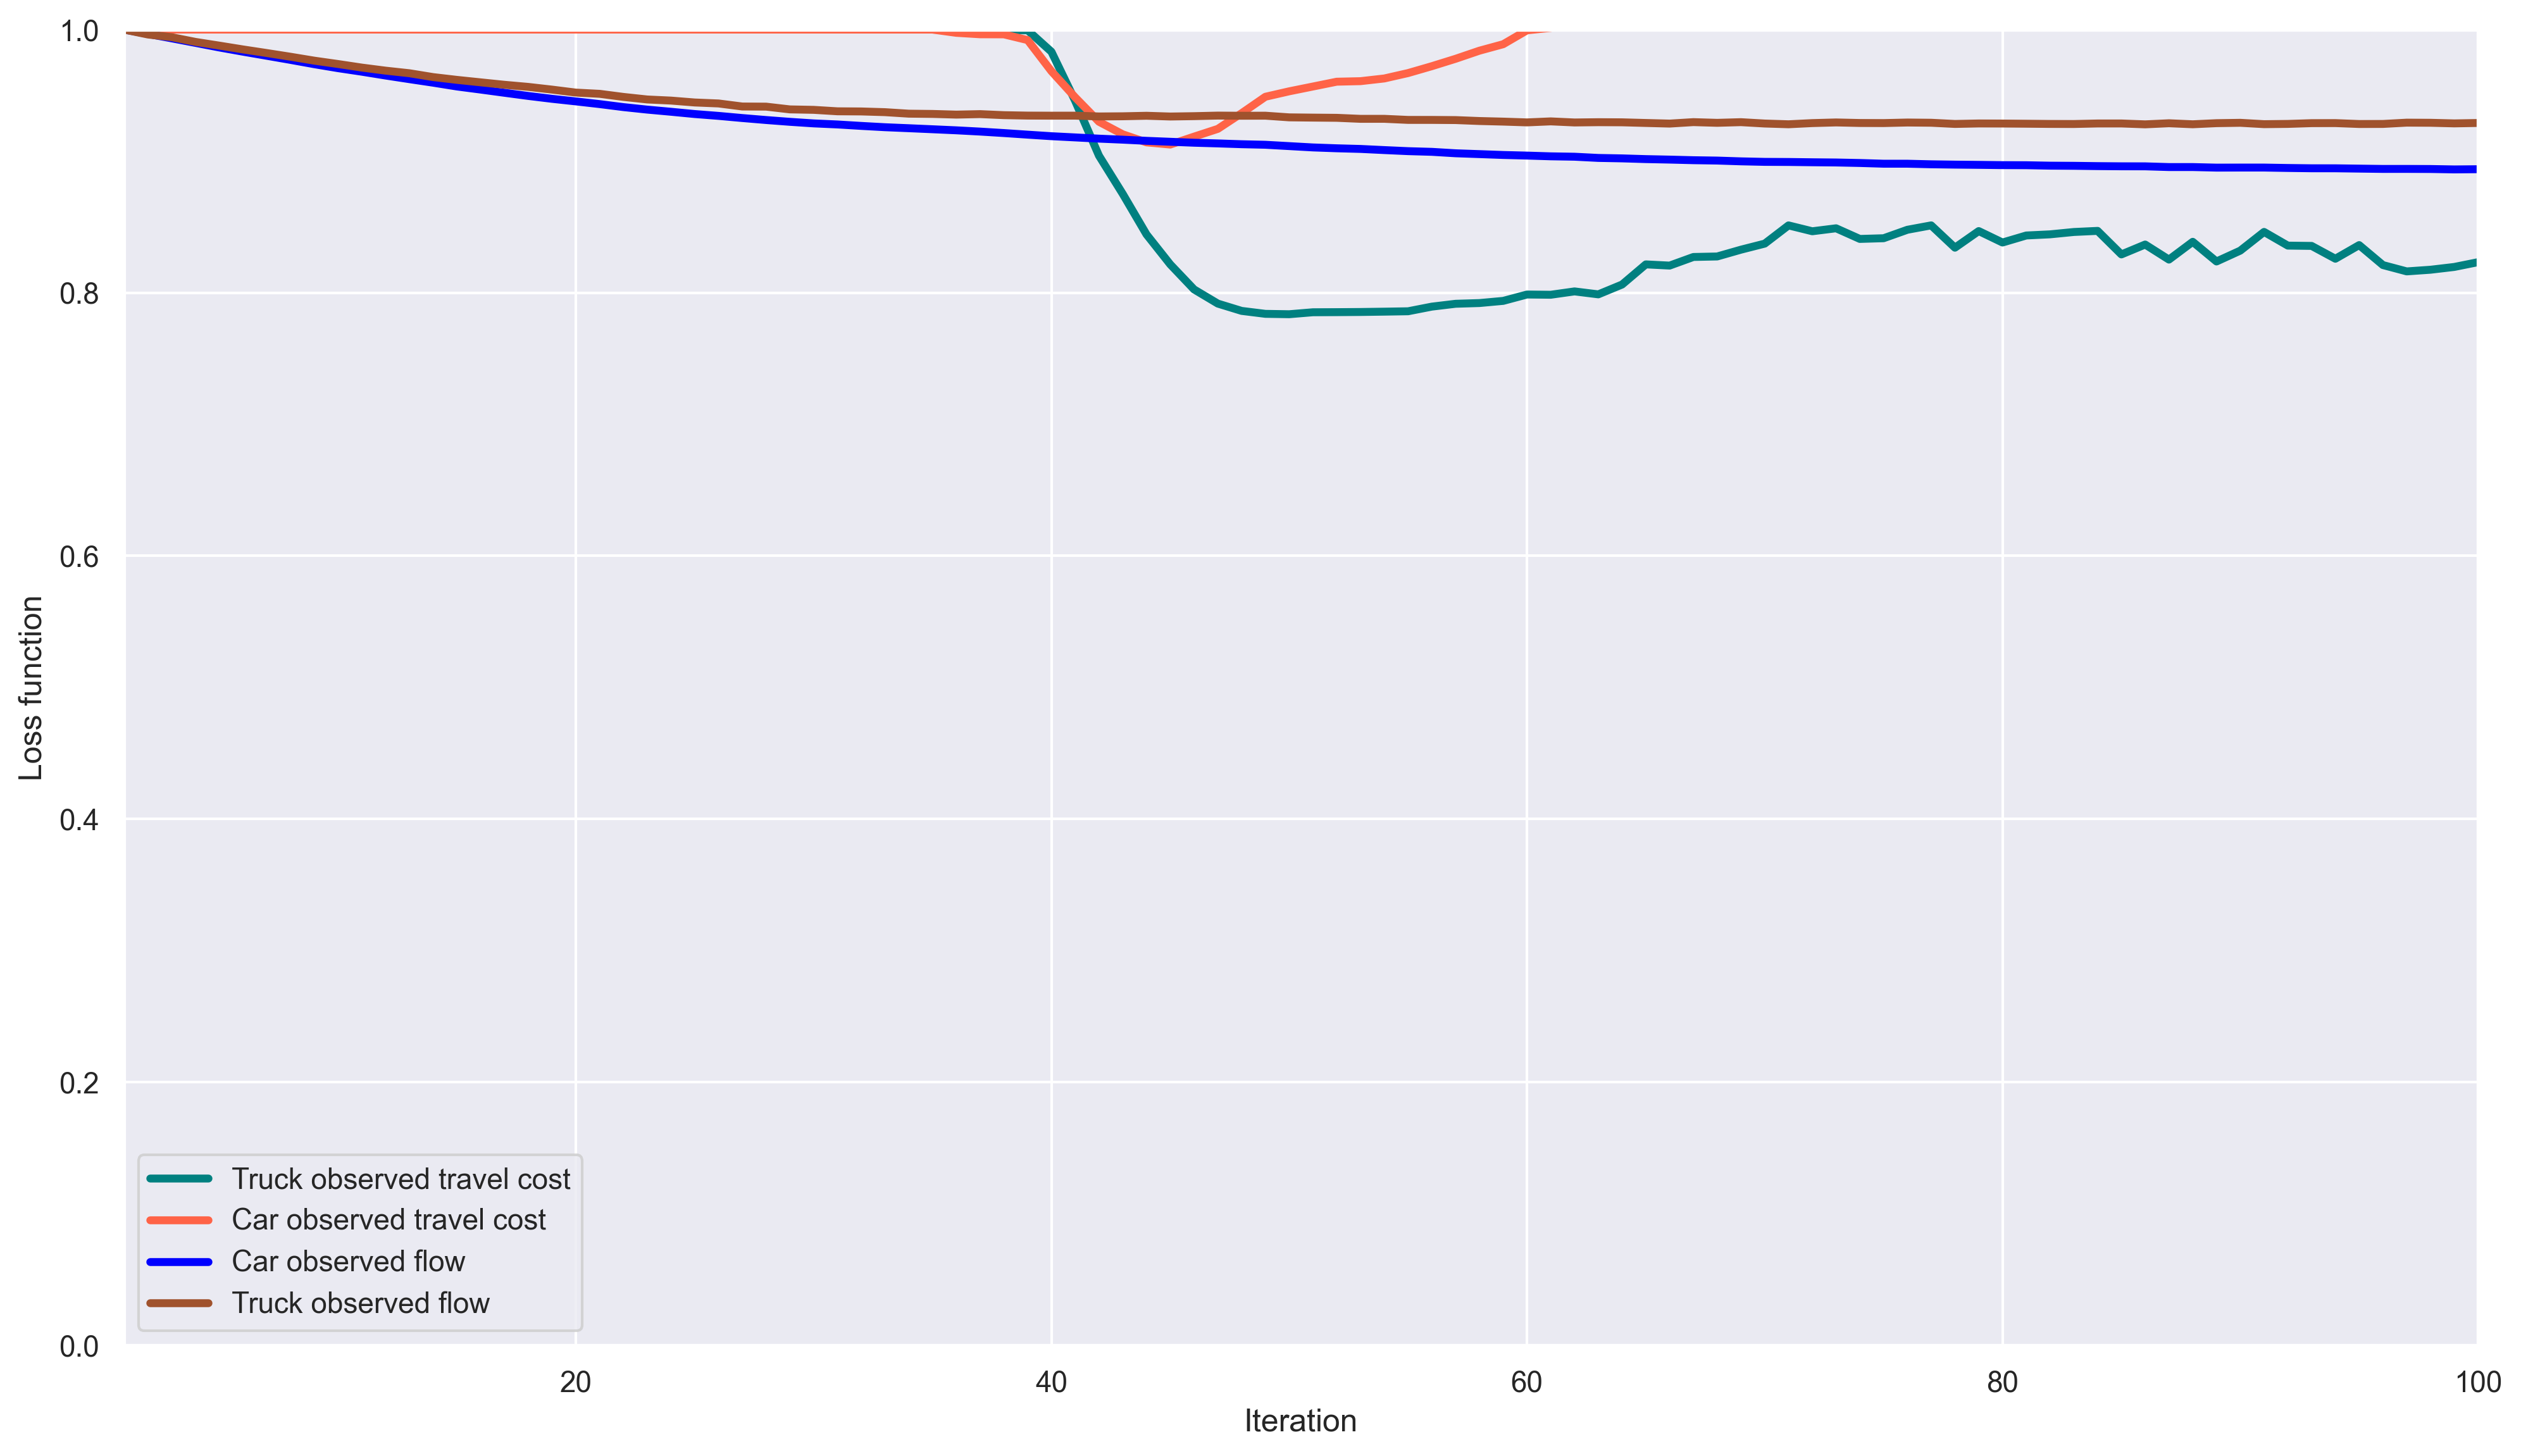

In [32]:
plt.figure(figsize = (16,9), dpi=300)
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['truck_tt_loss']/l_list[0][1]['truck_tt_loss'], l_list)), 
         color = color_list[0], linewidth = 3, label = "Truck observed travel cost")
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['car_tt_loss']/l_list[0][1]['car_tt_loss'], l_list)),
         color = color_list[1], linewidth = 3, label = "Car observed travel cost")
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['car_count_loss']/l_list[0][1]['car_count_loss'], l_list)),
         color = color_list[2], linewidth = 3, label = "Car observed flow")
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['truck_count_loss']/l_list[0][1]['truck_count_loss'], l_list)),
         color = color_list[3], linewidth = 3, label = "Truck observed flow")
# plt.plot(range(len(l_list)), list(map(lambda x: x[0]/8, l_list)),
#          color = color_list[4], linewidth = 3, label = "Total cost")

plt.ylabel('Loss function')
plt.xlabel('Iteration')
plt.legend()
plt.ylim([0, 1])
plt.xlim([1, 100])
plt.show()

In [ ]:
# (car_flow, truck_flow, l_list) = dode.estimate_path_flow_mp(max_epoch = 200, step_size = 0.1, car_init_scale = 5, 
#                                                           truck_init_scale = 0.1, 
#                                                           adagrad = True, n_process = 8)

In [ ]:
# (car_flow, truck_flow, l_list) = dode.estimate_path_flow(max_epoch = 200, step_size = 0.1, car_init_scale = 5, 
#                                                           truck_init_scale = 0.1, adagrad = True)

In [ ]:
# plt.figure(figsize = (16,9), dpi=300)
# plt.plot(range(1,151), l_list, color = 'tomato', linewidth = 3)
# plt.ylabel('Loss')
# plt.xlabel('Iteration')
# plt.xlim([1, 150])
# plt.show()

In [33]:
dta = dode._run_simulation(true_car_f, truck_flow)
estimated_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
estimated_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')

finish simulation


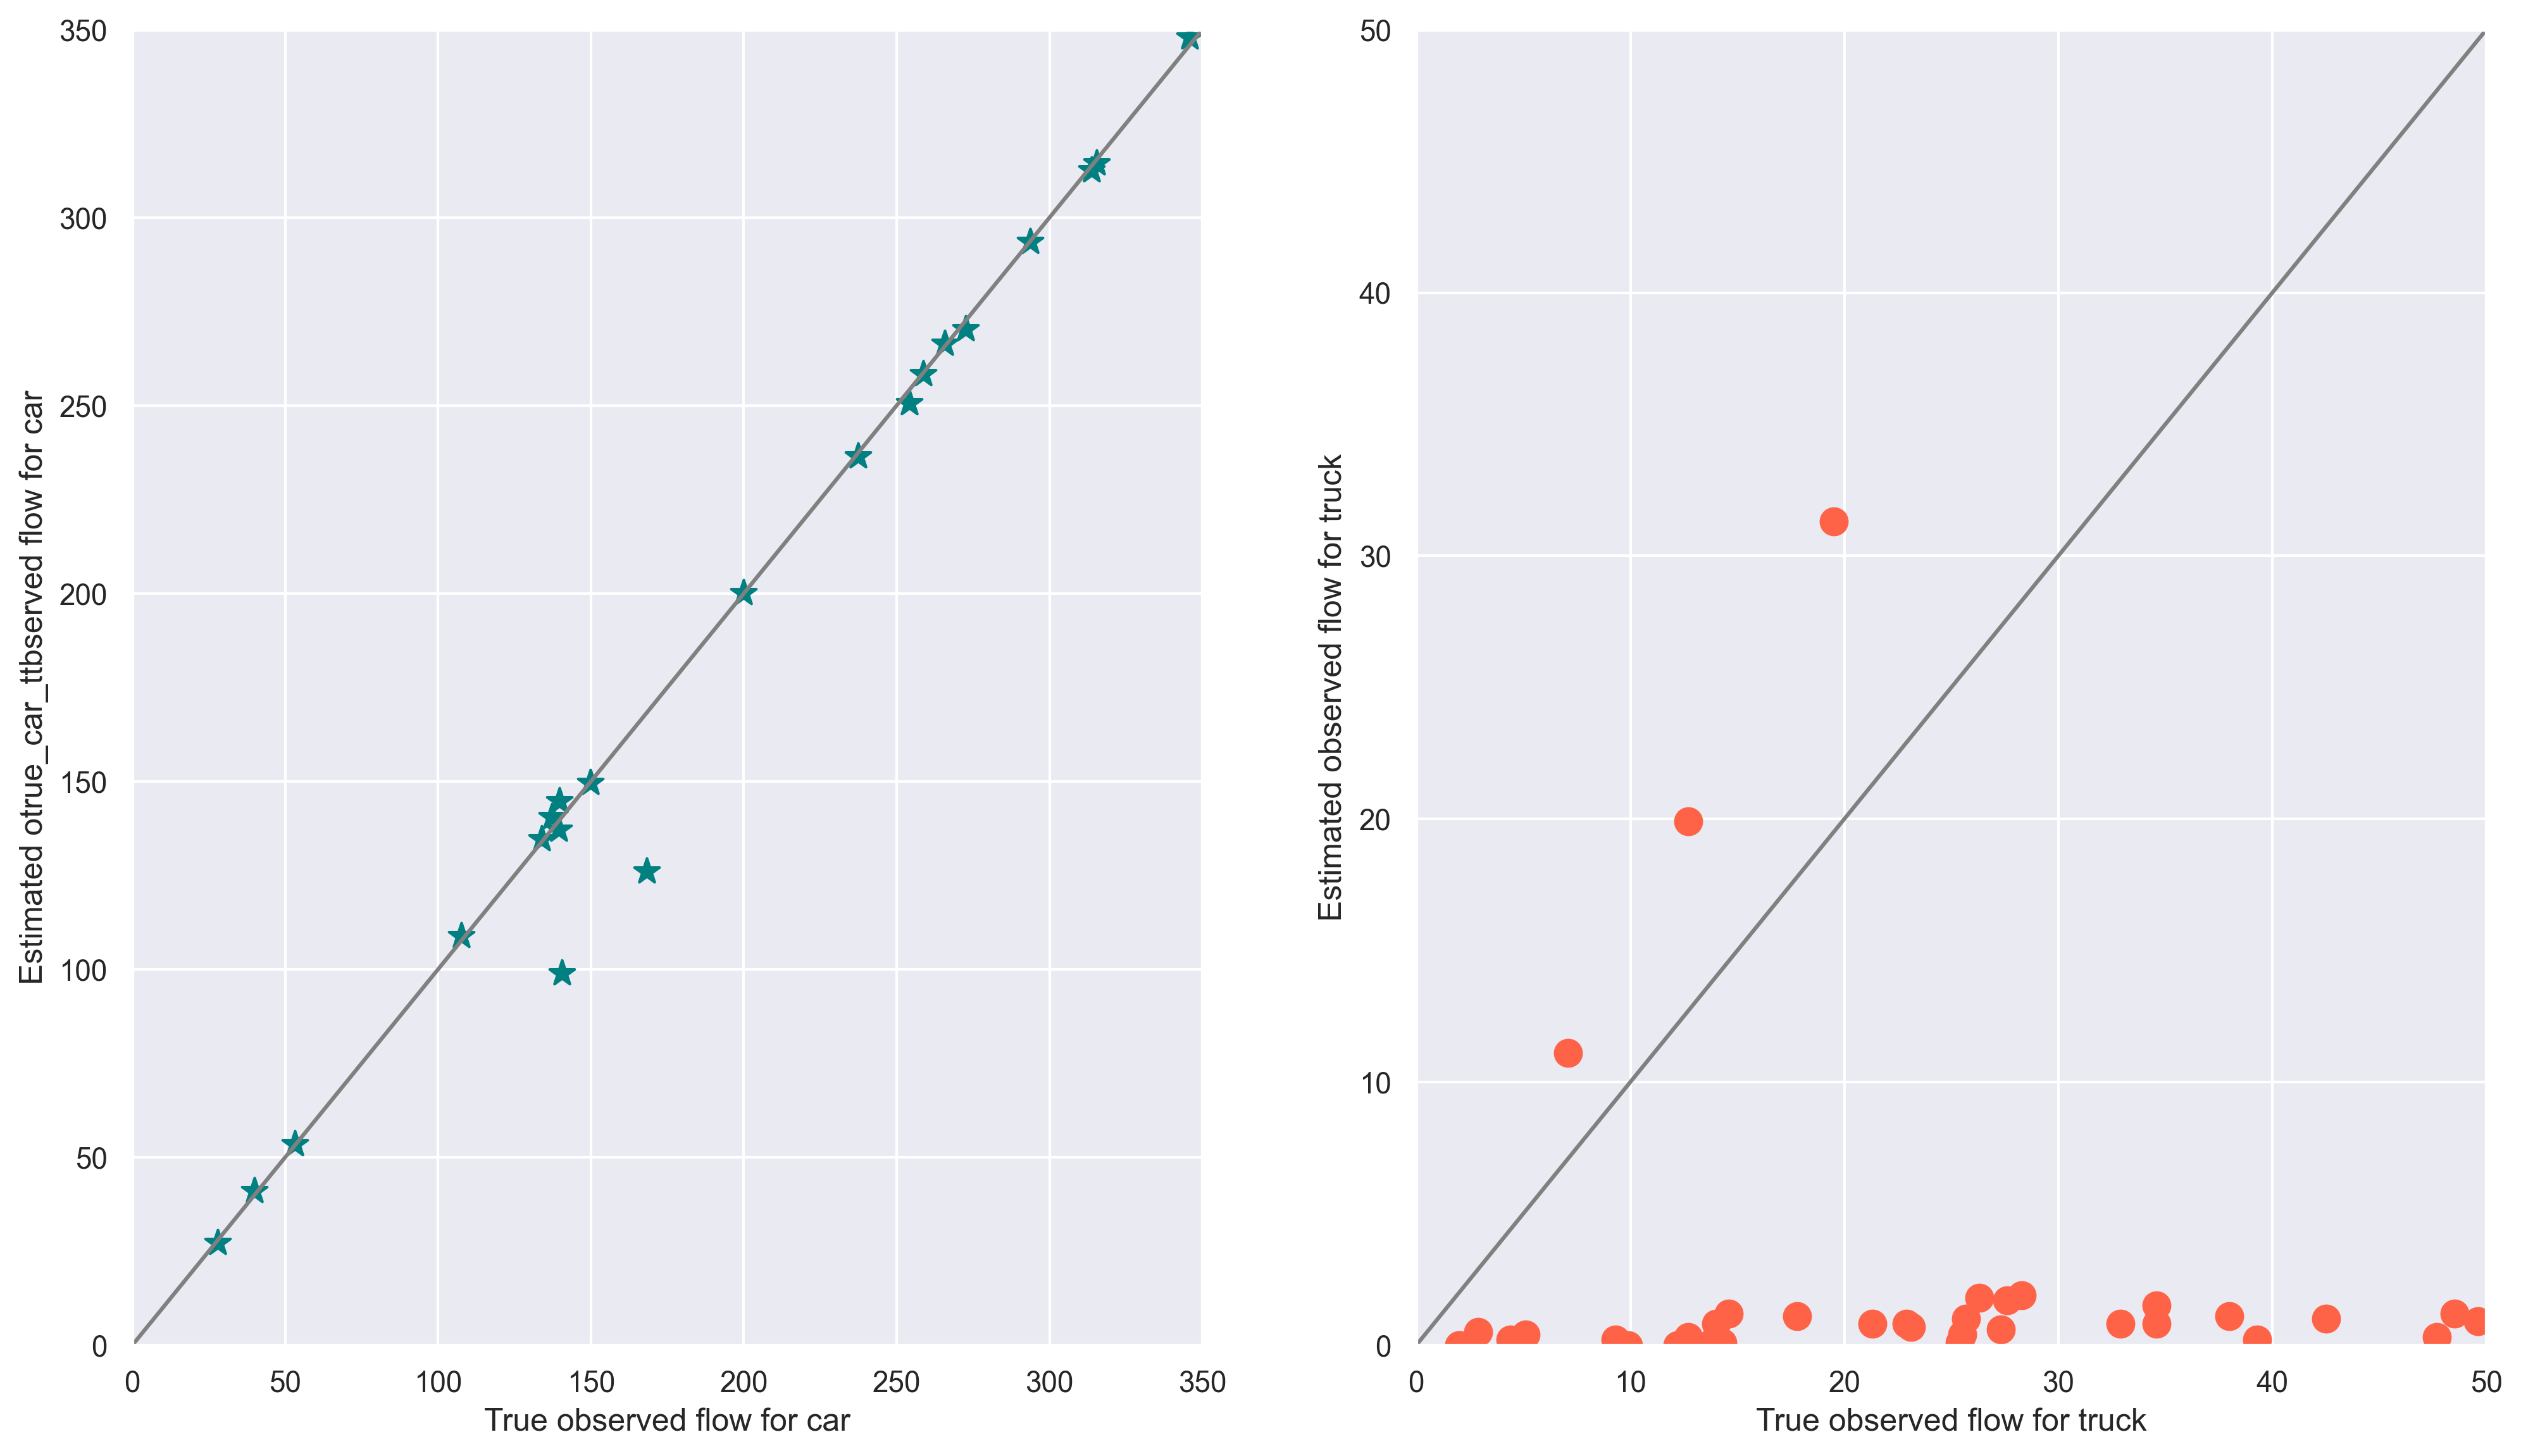

In [34]:
fig, axes = plt.subplots(1,2,  figsize=(16, 9), dpi=300)
# plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
axes[0].scatter(m_car, L_car.dot(estimated_car_x), label = "Proposed direct solution", color = 'teal', marker = '*', s = 100)
axes[0].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
axes[1].scatter(m_truck, L_truck.dot(estimated_truck_x), label = "Proposed closed-form method", color = 'tomato', 
                marker = "o", s = 100)
axes[1].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
# axes[1].plot(time_list2, gap_rec2, label = "Quadratic solver method", color = 'tomato')
# plt.ylabel("Equilibrium Gap")
# plt.xlabel("Iterations")
# plt.legend()
# plt.xlim([1, 100])
# axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# axes[0].set_title('Path flow rate (vehs/15-min)')
# axes[1].set_title('Path choice probablity')
axes[0].set_ylabel('Estimated otrue_car_ttbserved flow for car')
axes[0].set_xlabel('True observed flow for car')
axes[1].set_ylabel('Estimated observed flow for truck')
axes[1].set_xlabel('True observed flow for truck')
axes[0].set_xlim([0, 350])
axes[0].set_ylim([0, 350])
axes[1].set_xlim([0, 50])
axes[1].set_ylim([0, 50])
plt.show()

In [35]:
e_m_truck =L_truck.dot(estimated_truck_x)
print(rmsn(m_car, L_car.dot(estimated_car_x)))
print(rmsn(m_car, L_car.dot(estimated_car_x)))

0.23512725317727645
0.23512725317727645


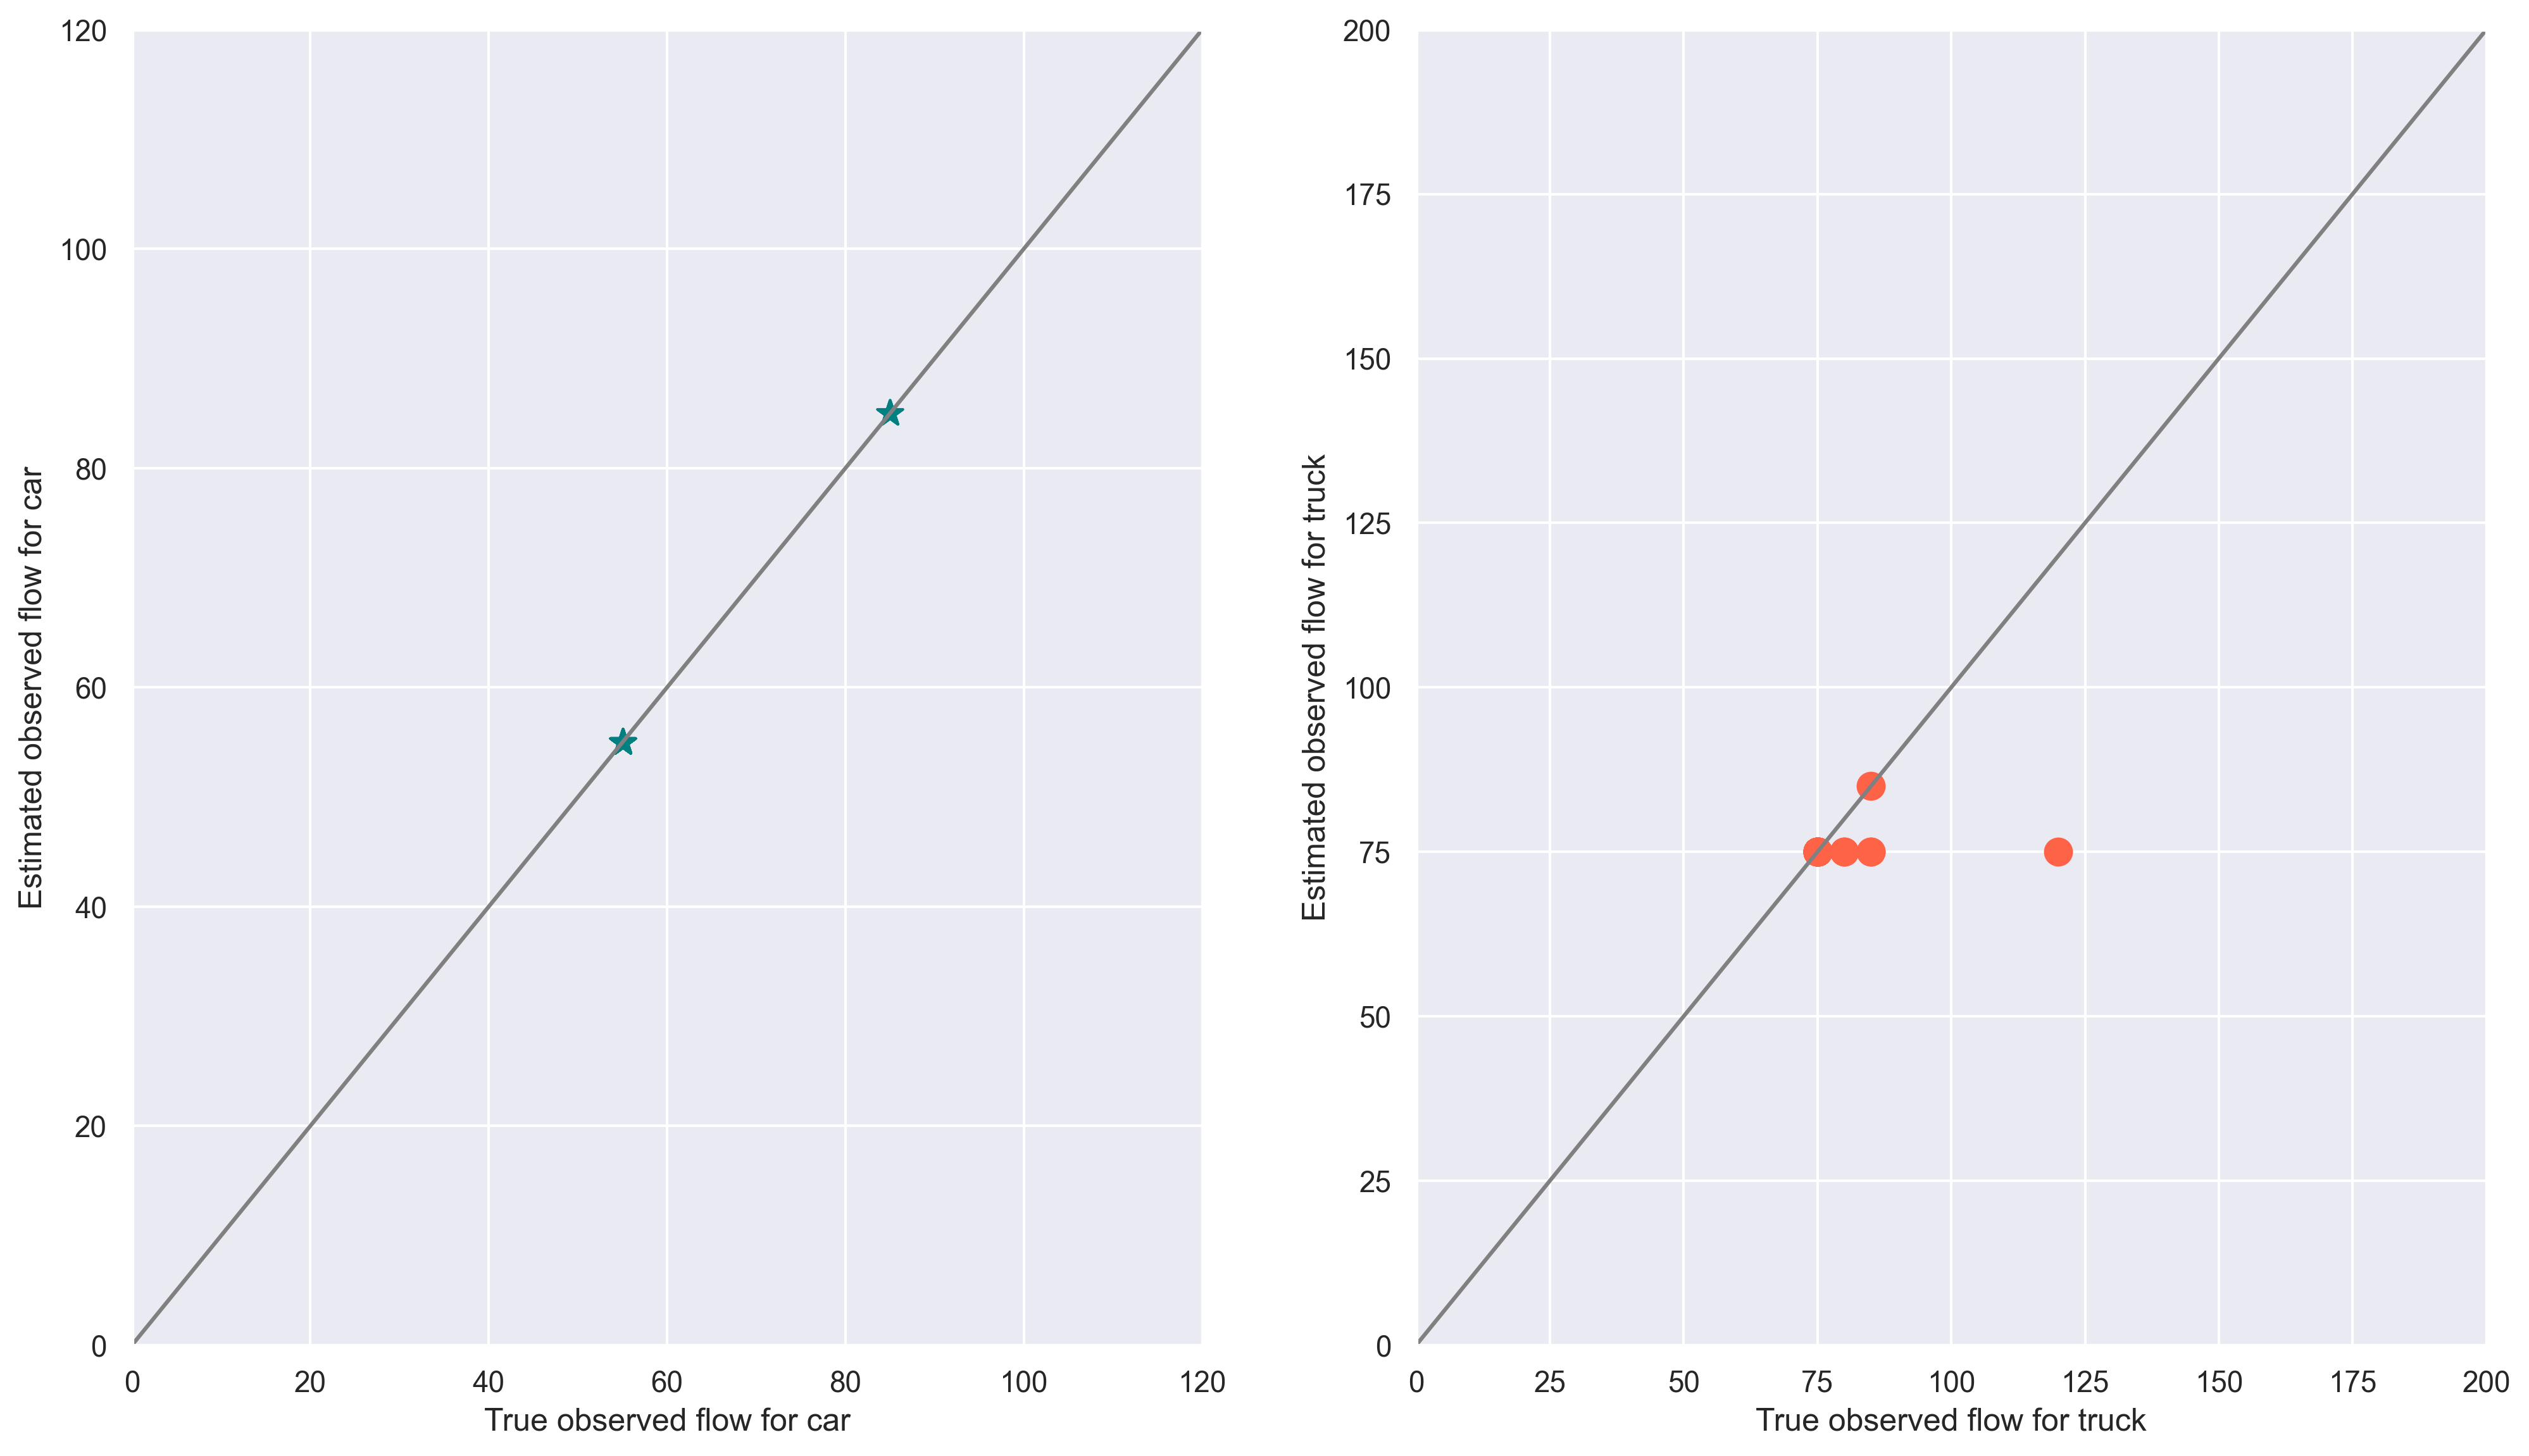

In [43]:
# fig, axes = plt.subplots(1,2,  figsize=(16, 9), dpi=300)
# # plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
# axes[0].scatter(true_car_tt, dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F'), label = "Proposed direct solution", color = 'teal', marker = '*', s = 100)
# axes[0].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
# axes[1].scatter(true_truck_tt, dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F'), label = "Proposed closed-form method", color = 'tomato', 
#                 marker = "o", s = 100)
# axes[1].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
# # axes[1].plot(time_list2, gap_rec2, label = "Quadratic solver method", color = 'tomato')
# # plt.ylabel("Equilibrium Gap")
# # plt.xlabel("Iterations")
# # plt.legend()
# # plt.xlim([1, 100])
# # axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# # axes[0].set_title('Path flow rate (vehs/15-min)')
# # axes[1].set_title('Path choice probablity')
# axes[0].set_ylabel('Estimated observed flow for car')
# axes[0].set_xlabel('True observed flow for car')
# axes[1].set_ylabel('Estimated observed flow for truck')
# axes[1].set_xlabel('True observed flow for truck')
# axes[0].set_xlim([0, 120])
# axes[0].set_ylim([0, 120])
# axes[1].set_xlim([0, 200])
# axes[1].set_ylim([0, 200])
# plt.show()
fig, axes = plt.subplots(1, 2, figsize=(16, 9), dpi=300)

time_points = np.arange(0, dode.num_loading_interval, dode.ass_freq).astype(np.float64)

car_link_tt = dta.get_car_link_tt(time_points, False)
truck_link_tt = dta.get_truck_link_tt(time_points, False)

axes[0].scatter(true_car_tt, car_link_tt.flatten(order='F'), label="Proposed direct solution", color='teal', marker='*', s=100)
axes[0].plot(range(350), range(350), label="Convex optimization solution", color='gray')

axes[1].scatter(true_truck_tt, truck_link_tt.flatten(order='F'), label="Proposed closed-form method", color='tomato', marker='o', s=100)
axes[1].plot(range(350), range(350), label="Convex optimization solution", color='gray')

axes[0].set_ylabel('Estimated observed flow for car')
axes[0].set_xlabel('True observed flow for car')
axes[1].set_ylabel('Estimated observed flow for truck')
axes[1].set_xlabel('True observed flow for truck')

axes[0].set_xlim([0, 120])
axes[0].set_ylim([0, 120])
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])

plt.show()

In [44]:
# est_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
# print(r2(true_car_tt, est_car_tt))
# est_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
# print(r2(true_truck_tt, est_truck_tt))
time_points = np.arange(0, dode.num_loading_interval, dode.ass_freq).astype(np.float64)

est_car_tt = dta.get_car_link_tt(time_points, False).flatten(order='F')
r2_car = r2_score(true_car_tt, est_car_tt)
print("R-squared for car:", r2_car)

est_truck_tt = dta.get_truck_link_tt(time_points, False).flatten(order='F')
r2_truck = r2_score(true_truck_tt, est_truck_tt)
print("R-squared for truck:", r2_truck)

R-squared for car: -0.14947571622866662
R-squared for truck: -0.4325835111123113


In [46]:

# dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
time_points = np.arange(0, dode.num_loading_interval, dode.ass_freq).astype(np.float64)
car_link_tt = dta.get_car_link_tt(time_points, False).flatten(order='F')

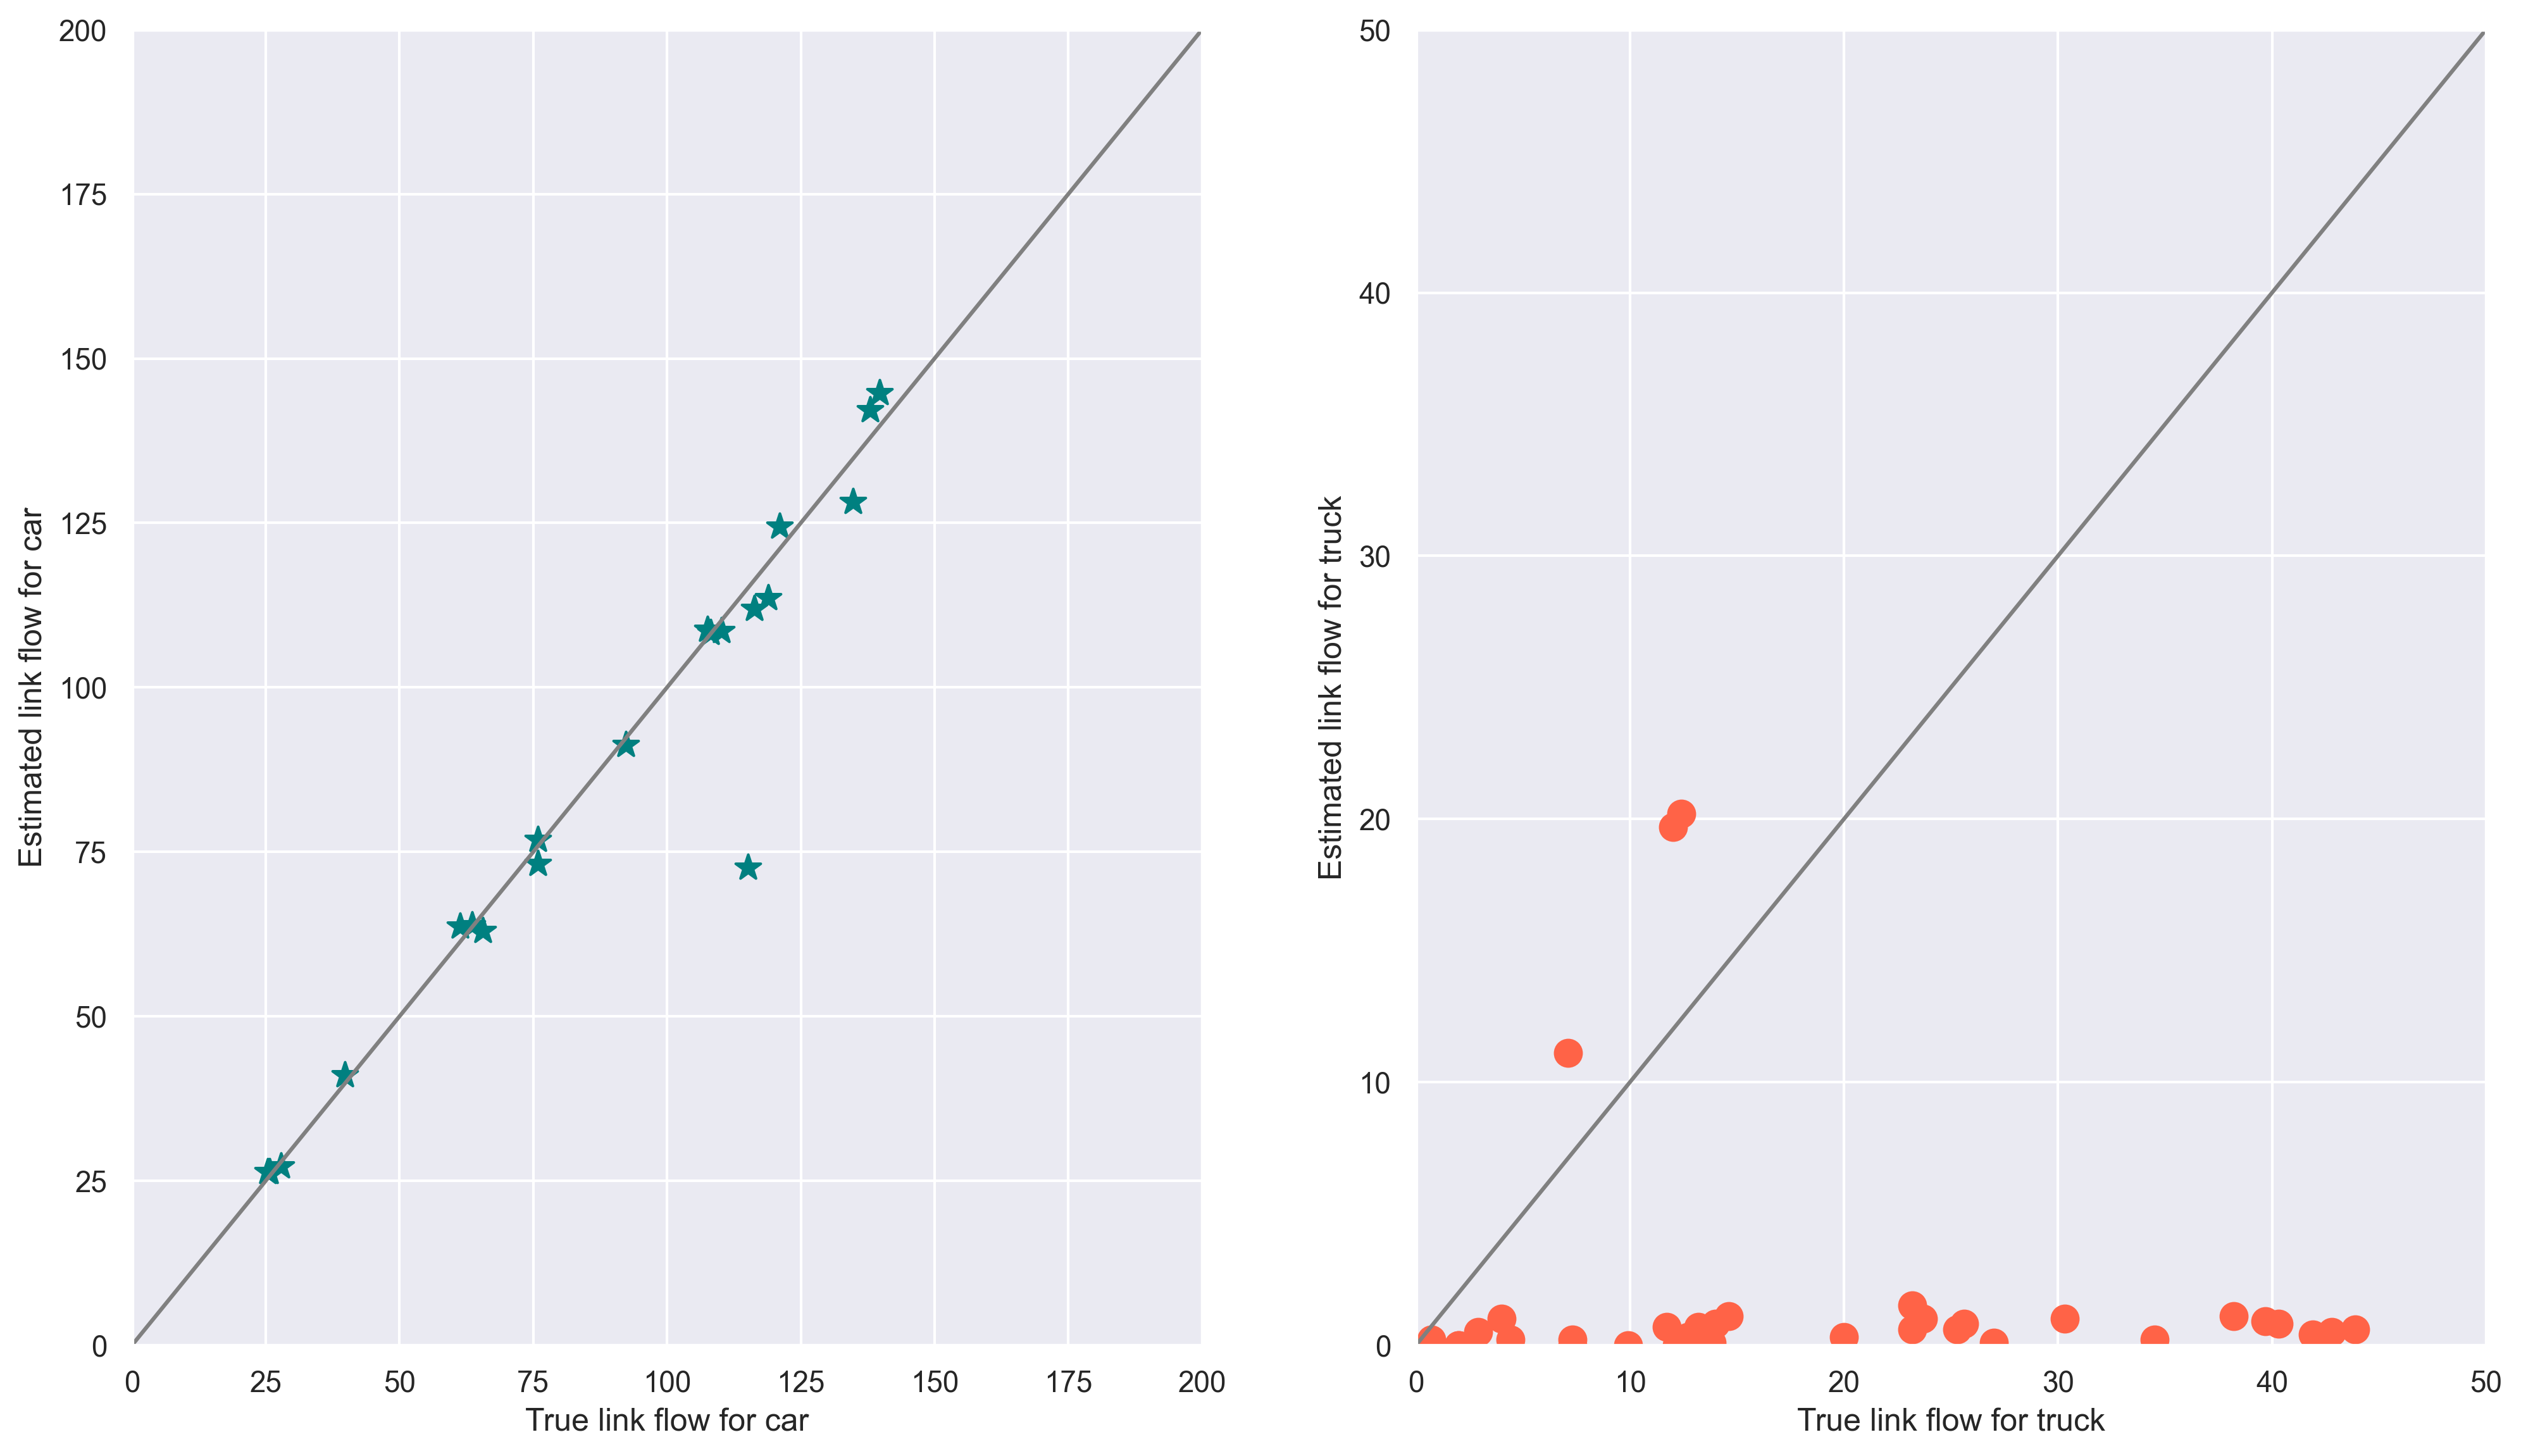

In [47]:
fig, axes = plt.subplots(1,2,  figsize=(16, 9), dpi=300)
# plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
axes[0].scatter(true_car_x, estimated_car_x, label = "Proposed direct solution", color = 'teal', marker = '*', s = 100)
axes[0].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
axes[1].scatter(true_truck_x, estimated_truck_x, label = "Proposed closed-form method", color = 'tomato', 
                marker = "o", s = 100)
axes[1].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
# axes[1].plot(time_list2, gap_rec2, label = "Quadratic solver method", color = 'tomato')
# plt.ylabel("Equilibrium Gap")
# plt.xlabel("Iterations")
# plt.legend()
# plt.xlim([1, 100])
# axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# axes[0].set_title('Path flow rate (vehs/15-min)')
# axes[1].set_title('Path choice probablity')
axes[0].set_ylabel('Estimated link flow for car')
axes[0].set_xlabel('True link flow for car')
axes[1].set_ylabel('Estimated link flow for truck')
axes[1].set_xlabel('True link flow for truck')
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[1].set_xlim([0, 50])
axes[1].set_ylim([0, 50])
plt.show()

In [48]:
print(r2(true_car_x, estimated_car_x))
print(r2(true_truck_x[estimated_truck_x<30], estimated_truck_x[estimated_truck_x<30]))

0.9181697377445186
-20.535702442207473


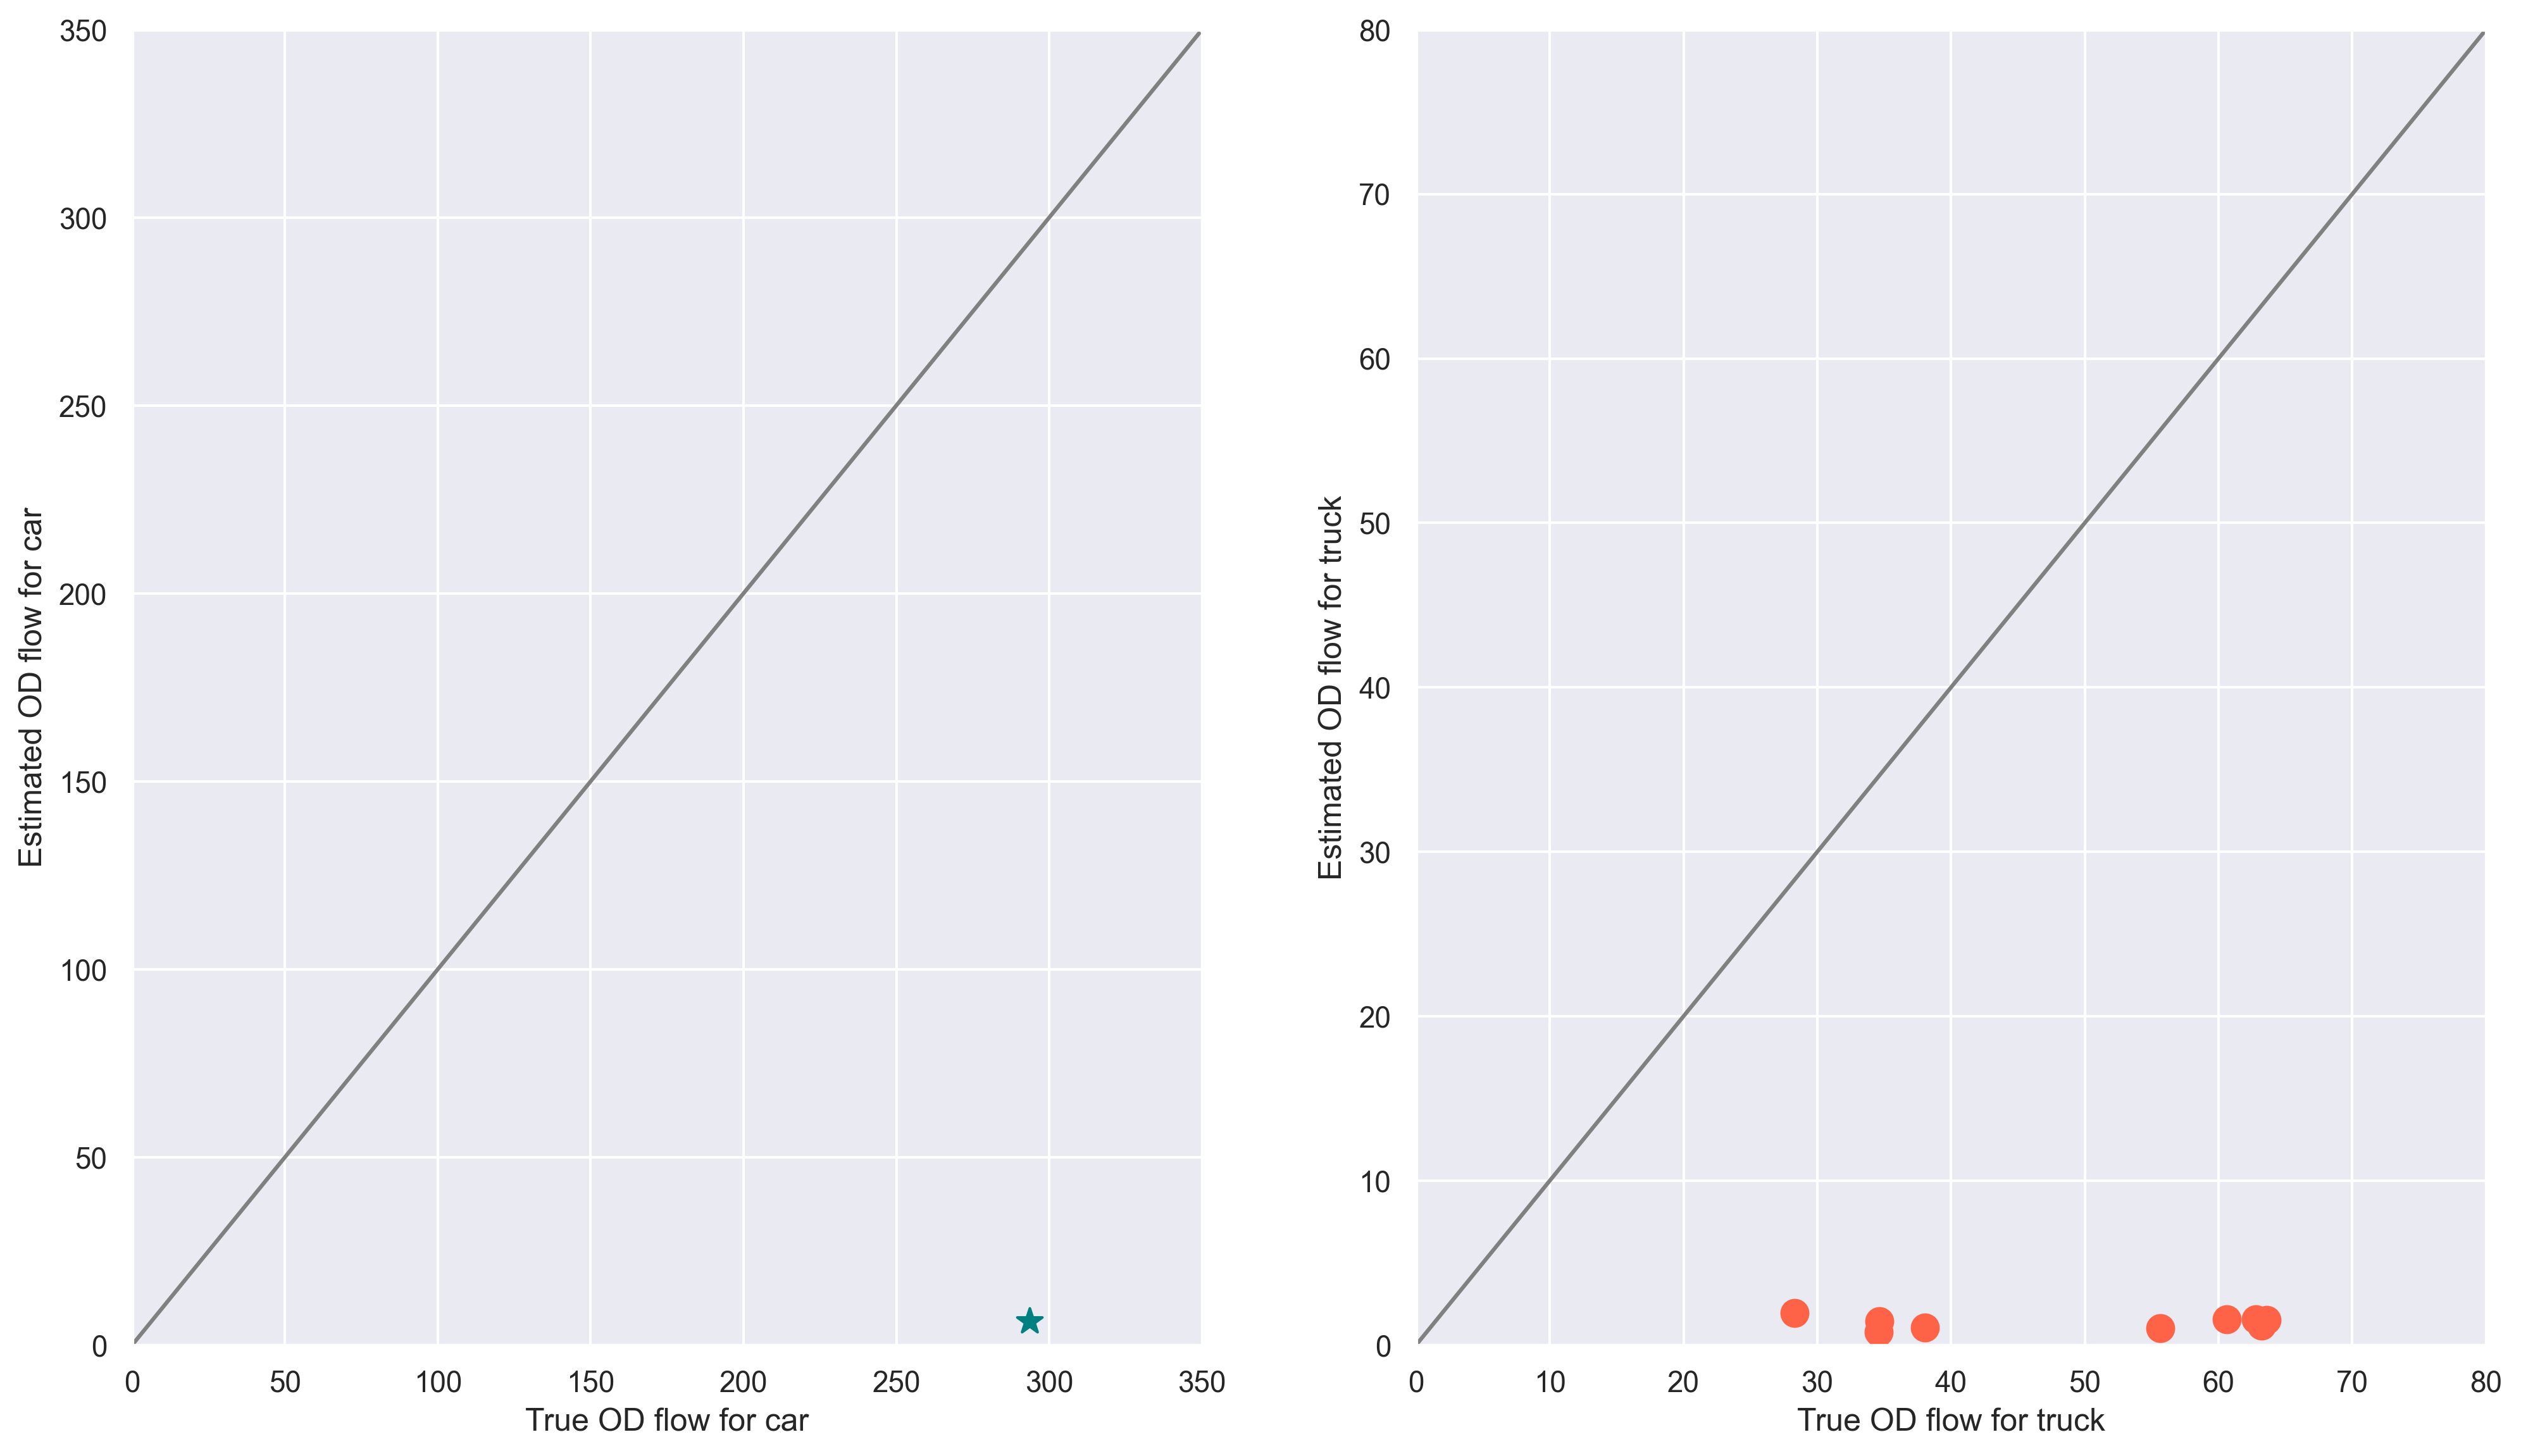

In [49]:
true_car_q = true_car_f.reshape(3, -1, order = 'F').sum(axis = 0)
est_car_q = car_flow.reshape(3, -1, order = 'F').sum(axis = 0)
true_truck_q = true_truck_f.reshape(3, -1, order = 'F').sum(axis = 0)
est_truck_q = truck_flow.reshape(3, -1, order = 'F').sum(axis = 0)

fig, axes = plt.subplots(1,2,  figsize=(16, 9), dpi=300)
# truck_flow = true_truck_f + np.random.rand(len(true_car_f)) * 2- 1
# plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
axes[0].scatter(true_car_q, est_car_q, label = "Proposed direct solution", color = 'teal', marker = '*', s = 100)
axes[0].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
axes[1].scatter(true_truck_q, est_truck_q, label = "Proposed closed-form method", color = 'tomato', 
                marker = "o", s = 100)
axes[1].plot(range(350), range(350), label = "Convex optimization solution", color = 'gray')
# axes[1].plot(time_list2, gap_rec2, label = "Quadratic solver method", color = 'tomato')
# plt.ylabel("Equilibrium Gap")
# plt.xlabel("Iterations")
# plt.legend()
# plt.xlim([1, 100])
# axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# axes[0].set_title('Path flow rate (vehs/15-min)')
# axes[1].set_title('Path choice probablity')
axes[0].set_ylabel('Estimated OD flow for car')
axes[0].set_xlabel('True OD flow for car')
axes[1].set_ylabel('Estimated OD flow for truck')
axes[1].set_xlabel('True OD flow for truck')
axes[0].set_xlim([0, 350])
axes[0].set_ylim([0, 350])
axes[1].set_xlim([0, 80])
axes[1].set_ylim([0, 80])
plt.show()

In [50]:
print(r2(true_car_q, est_car_q))
print(r2(true_truck_q, est_truck_q))

-1.3105786432128261
-1.6767297812012294


## Without speed

In [ ]:
config = dict()
config['use_car_link_flow'] = True
config['use_truck_link_flow'] = True
config['use_car_link_tt'] = False
config['use_truck_link_tt'] = False
config['car_count_agg'] = True
config['truck_count_agg'] = True
config['link_car_flow_weight'] = 1
config['link_truck_flow_weight'] = 1
config['link_car_tt_weight'] = 0.1
config['link_truck_tt_weight'] = 0.1
config['num_data'] = 8
config['observed_links'] = observed_link_list
config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])


config['compute_car_link_flow_loss'] = True
config['compute_truck_link_flow_loss'] = True
config['compute_car_link_tt_loss'] = True
config['compute_truck_link_tt_loss'] = True

In [ ]:
dode = MCDODE(nb, config)
dode.add_data(data_dict)

In [ ]:
(car_flow, truck_flow, l_list) = dode.estimate_path_flow(max_epoch = 100, car_step_size = 1, 
                                                         truck_step_size = 0.1, car_init_scale = 5, 
                                                          truck_init_scale = 1, adagrad = True)
print r2_score(car_flow, true_car_f), r2_score(truck_flow, true_truck_f)

In [ ]:
# pickle.dump([true_car_f, true_truck_f, car_flow, truck_flow, l_list, data_dict], open('no_spd.pickle', 'w'))

In [ ]:
true_car_q = true_car_f.reshape(3, -1, order = 'F').sum(axis = 0)
est_car_q = car_flow.reshape(3, -1, order = 'F').sum(axis = 0)
true_truck_q = true_truck_f.reshape(3, -1, order = 'F').sum(axis = 0)
est_truck_q = truck_flow.reshape(3, -1, order = 'F').sum(axis = 0)


In [ ]:
print r2_score(true_car_q, est_car_q)
print r2_score(true_truck_q, est_truck_q)

In [ ]:
_, _, _, _, l_list, _ = pickle.load(open('final_use.pickle', 'r'))
_, _, _, _, l_list_nospd, _ = pickle.load(open('no_spd.pickle', 'r'))

In [ ]:
plt.figure(figsize = (16,9), dpi=300)
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['car_count_loss'], l_list)), 
         color = color_list[0], linewidth = 3, label = "Truck observed travel cost")
plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['car_count_loss'], l_list_nospd)),
         color = color_list[1], linewidth = 3, label = "ooo")
# plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['car_count_loss']/10, l_list)),
#          color = color_list[2], linewidth = 3, label = "Car observed flow")
# plt.plot(np.arange(len(l_list))+1, list(map(lambda x: x[1]['truck_count_loss'], l_list)),
#          color = color_list[3], linewidth = 3, label = "Truck observed flow")
# plt.plot(range(len(l_list)), list(map(lambda x: x[0]/8, l_list)),
#          color = color_list[4], linewidth = 3, label = "Total cost")

plt.ylabel('Loss function')
plt.xlabel('Iteration')
plt.legend()
plt.xlim([1, 100])
plt.show()

## Multiple cpu

In [ ]:
observed_link_list = [3, 4, 5, 6]
ml_car = 6
ml_truck = 5
data_dict = dict()
num_interval = nb.config.config_dict['DTA']['max_interval']
# true_car_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 300
# true_truck_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 30
true_car_f, true_truck_f, _, _, _, _ = pickle.load(open('final_use.pickle', 'r'))
# true_car_x = np.random.rand(num_interval * len(observed_link_list)) * 100
# true_truck_x = np.random.rand(num_interval * len(observed_link_list)) * 10
# L_car_one = np.random.randint(2, size = (ml_car, len(observed_link_list)))
L_car_one = np.array([[1, 0, 0, 1],
                      [0, 0, 1, 1],
                      [1, 1, 0, 1],
                      [1, 0, 1, 1],
                      [1, 0, 0, 0],
                      [0, 1, 0, 1]])
L_truck_one = np.array([[1, 0, 0, 1],
                        [0, 0, 0, 1],
                        [1, 1, 0, 1],
                        [1, 0, 1, 0],
                        [0, 1, 0, 1]])
# L_truck_one = np.random.randint(2, size = (ml_truck, len(observed_link_list)))
L_car = csr_matrix(scipy.linalg.block_diag(*[L_car_one for i in range(num_interval)]))
L_truck = csr_matrix(scipy.linalg.block_diag(*[L_truck_one for i in range(num_interval)]))

config = dict()
config['use_car_link_flow'] = True
config['use_truck_link_flow'] = True
config['use_car_link_tt'] = True
config['use_truck_link_tt'] = True
config['car_count_agg'] = True
config['truck_count_agg'] = True
config['link_car_flow_weight'] = 1
config['link_truck_flow_weight'] = 1
config['link_car_tt_weight'] = 0.1
config['link_truck_tt_weight'] = 0.1
config['num_data'] = 8
config['observed_links'] = observed_link_list
config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])


config['compute_car_link_flow_loss'] = True
config['compute_truck_link_flow_loss'] = True
config['compute_car_link_tt_loss'] = True
config['compute_truck_link_tt_loss'] = True

dode = MCDODE(nb, config)
dta = dode._run_simulation(true_car_f, true_truck_f)
true_car_dar, true_truck_dar = dode.get_dar(dta, true_car_f, true_truck_f)

noise_level = 0.1
# (true_dar_car, true_dar_truck) = dode.get_dar(dta, true_car_f, true_truck_f)
# true_car_x = true_dar_car.dot(true_car_f)
# true_truck_x = true_dar_truck.dot(true_truck_f)
data_dict['car_count_agg_L_list'] = list()
data_dict['truck_count_agg_L_list'] = list()
data_dict['car_link_flow'] = []
data_dict['truck_link_flow'] = []
data_dict['car_link_tt'] = []
data_dict['truck_link_tt'] = []
for i in range(config['num_data']):
    true_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    true_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
#     true_car_tt = dta.get_car_link_tt_robust(np.arange(0, dode.num_loading_interval, dode.ass_freq),
#                              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    true_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    true_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    m_car = L_car.dot(true_car_x)
    m_truck = L_truck.dot(true_truck_x)
    data_dict['car_count_agg_L_list'].append(L_car)
    data_dict['truck_count_agg_L_list'].append(L_truck)
    data_dict['car_link_flow'].append(m_car + np.random.uniform(-1, 1, m_car.shape) * noise_level * m_car)
    data_dict['truck_link_flow'].append(m_truck + np.random.uniform(-1, 1, m_truck.shape) * noise_level * m_truck)
    data_dict['car_link_tt'].append(true_car_tt + np.random.uniform(-1, 1, true_car_tt.shape) * noise_level * true_car_tt)
    data_dict['truck_link_tt'].append(true_truck_tt + np.random.uniform(-1, 1, true_truck_tt.shape) * noise_level * true_truck_tt)

In [ ]:
dode = MCDODE(nb, config)
dode.add_data(data_dict)

In [ ]:
for n in [1,2,4,8]:
    (car_flow, truck_flow, l_list) = dode.estimate_path_flow_mp(max_epoch = 100, car_step_size = 1, 
                                                             truck_step_size = 0.1, car_init_scale = 5, 
                                                              truck_init_scale = 1, adagrad = True, 
                                                                record_time = True, n_process = n)
#     print r2_score(car_flow, true_car_f), r2_score(truck_flow, true_truck_f)
    print l_list[99][2]
    pickle.dump([true_car_f, true_truck_f, car_flow, truck_flow, l_list, data_dict], open("cpu" + str(n)+ '.pickle', 'w'))

In [ ]:
plt.figure(figsize=(16, 9), dpi=300)
for i, n in enumerate([1,2,4,8]):
    [_, _, _, _, l_list, _] = pickle.load(open("cpu" + str(n)+ '.pickle', 'r'))
#     axes[0].plot(np.arange(100)+1, list(map(lambda x: x[0]/8, l_list)) , label = "cpu" + str(n), color = color_list[i])
    plt.plot(list(map(lambda x: x[2], l_list)), list(map(lambda x: x[0]/8, l_list)), label = "cpu" + str(n), color = color_list[i])
plt.legend()
plt.show()

## Compare algorithm

In [ ]:
dode = MCDODE(nb, config)
dode.add_data(data_dict)

In [ ]:
(car_flow, truck_flow, l_list_gd) = dode.estimate_path_flow(max_epoch = 100, car_step_size = 0.01, 
                                                          truck_step_size = 0.001, car_init_scale = 5, 
                                                          truck_init_scale = 0.1, adagrad = False)

In [ ]:
pickle.dump([true_car_f, true_truck_f, car_flow, truck_flow, l_list_gd, data_dict], open("sgd.pickle", 'w'))

In [ ]:
(car_flow, truck_flow, l_list_gd) = dode.estimate_path_flow_gd(max_epoch = 100, car_step_size = 0.01, 
                                                          truck_step_size = 0.001, car_init_scale = 5, 
                                                          truck_init_scale = 0.1, adagrad = False)

In [ ]:
pickle.dump([true_car_f, true_truck_f, car_flow, truck_flow, l_list_gd, data_dict], open("gd.pickle", 'w'))

In [ ]:
[_, _, _, _, l_list1, _] = pickle.load(open("final_use.pickle", 'r'))
[_, _, _, _, l_list2, _] = pickle.load(open("sgd.pickle", 'r'))
[_, _, _, _, l_list3, _] = pickle.load(open("gd.pickle", 'r'))

In [ ]:
plt.figure(figsize = (16,9), dpi = 300)
plt.plot(np.arange(100)+1, list(map(lambda x: x[0]/8, l_list3)), color = 'teal', label ="GD", linewidth = 3)
plt.plot(np.arange(101)+1, [l_list3[0][0]/8]+list(map(lambda x: x[0]/8, l_list2)), color = 'tomato', label = "SGD", linewidth = 3)
plt.plot(np.arange(101)+1, [l_list3[0][0]/8]+list(map(lambda x: x[0]/8, l_list1)), color = 'blue', label = "Adagrad", linewidth = 3)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.xlim([1, 100])
plt.show()

## Different initia

In [ ]:
dode = MCDODE(nb, config)
dode.add_data(data_dict)
res_df = pd.DataFrame(index = range(100), columns = ['y_car', 'y_truck', 'x_car', 'x_truck', 'q_car', 'q_truck',
                                                   'c_car', 'c_truck'])
for i in range(100):
    dode = MCDODE(nb, config)
    dode.add_data(data_dict)
    (car_flow, truck_flow, l_list) = dode.estimate_path_flow(max_epoch = 100, car_step_size = 1, 
                                                             truck_step_size = 0.1, car_init_scale = 5, 
                                                          truck_init_scale = 0.1, adagrad = True)
    dta = dode._run_simulation(car_flow, truck_flow)
    estimated_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    estimated_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    true_car_q = true_car_f.reshape(3, -1, order = 'F').sum(axis = 0)
    est_car_q = car_flow.reshape(3, -1, order = 'F').sum(axis = 0)
    true_truck_q = true_truck_f.reshape(3, -1, order = 'F').sum(axis = 0)
    est_truck_q = truck_flow.reshape(3, -1, order = 'F').sum(axis = 0)
    est_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    est_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    y_car = r2_score(m_car, L_car.dot(estimated_car_x))
    e_m_truck =L_truck.dot(estimated_truck_x)
    y_truck = r2_score(m_truck, e_m_truck)
#     truck_flow = true_truck_f + (np.random.rand(len(true_car_f)) * 2- 1) * np.random.rand() * 2
    x_car = r2_score(true_car_x, estimated_car_x)
    x_truck = r2_score(true_truck_x, estimated_truck_x)
    q_car =  r2_score(true_car_q, est_car_q)
    q_truck =  r2_score(true_truck_q, est_truck_q)
    c_car =  r2(true_car_tt, est_car_tt)
    c_truck =  r2(true_truck_tt, est_truck_tt)
    print [y_car, y_truck, x_car, x_truck, q_car, q_truck, c_car, c_truck]
    res_df.iloc[i] = [y_car, y_truck, x_car, x_truck, q_car, q_truck, c_car, c_truck]

In [ ]:
[y_car, y_truck, x_car, x_truck, q_car, q_truck, c_car, c_truck]

In [ ]:
pickle.dump(res_df, open('initf_res_df.pickle', 'wb'))

In [ ]:
res_df

In [ ]:
res_rdf = pd.DataFrame(index = range(800), columns = ['R-square', 'Vehicle Class', 'Flow'])
for i in range(100):
#     print i
    res_rdf.iloc[i * 8 + 0] = [res_df.iloc[i, 0], 'car', 'Observed Flow']
    res_rdf.iloc[i * 8 + 1] = [res_df.iloc[i, 1], 'truck', 'Observed Flow']
    res_rdf.iloc[i * 8 + 2] = [res_df.iloc[i, 2], 'car', 'Link Flow']
    res_rdf.iloc[i * 8 + 3] = [res_df.iloc[i, 3], 'truck', 'Link Flow']
    res_rdf.iloc[i * 8 + 4] = [res_df.iloc[i, 4], 'car', 'OD Demand']
    res_rdf.iloc[i * 8 + 5] = [res_df.iloc[i, 5], 'truck', 'OD Demand']
    res_rdf.iloc[i * 8 + 6] = [res_df.iloc[i, 6], 'car', 'Link Cost']
    res_rdf.iloc[i * 8 + 7] = [res_df.iloc[i, 7], 'truck', 'Link Cost']

In [ ]:
res_rdf['R-square'] = res_rdf['R-square'].astype(np.float32)

In [ ]:
plt.figure(figsize = (16,9), dpi=300)
sns.boxplot(x="Flow", y="R-square", hue="Vehicle Class",
#                split=True, inner="quart",
#                palette={"Yes": "y", "No": "b"},
                palette=["teal", "tomato"], linewidth=1.5, fliersize = 5,
               data=res_rdf)
plt.show()

## Different observation

In [ ]:
dode = MCDODE(nb, config)
(f_car, f_truck) = dode.init_path_flow(car_scale = 5, truck_scale = 0.1)
pickle.dump((f_car, f_truck, None), open('init4obs.pickle', 'w'))

In [ ]:
# res2_df = pd.DataFrame(index = range(100), columns = ['y_car', 'y_truck', 'x_car', 'x_truck', 'q_car', 'q_truck',
#                                                    'c_car', 'c_truck'])
for jjj in range(97, 100):
    observed_link_list = [3, 4, 5, 6]
    ml_car = 6
    ml_truck = 5
    data_dict = dict()
    num_interval = nb.config.config_dict['DTA']['max_interval']
    # true_car_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 300
    # true_truck_f = np.random.rand(num_interval * nb.config.config_dict['FIXED']['num_path']) * 30
    true_car_f, true_truck_f, _, _, _, _ = pickle.load(open('final_use.pickle', 'r'))
    # true_car_x = np.random.rand(num_interval * len(observed_link_list)) * 100
    # true_truck_x = np.random.rand(num_interval * len(observed_link_list)) * 10
    # L_car_one = np.random.randint(2, size = (ml_car, len(observed_link_list)))
    L_car_one = np.array([[1, 0, 0, 1],
                          [0, 0, 1, 1],
                          [1, 1, 0, 1],
                          [1, 0, 1, 1],
                          [1, 0, 0, 0],
                          [0, 1, 0, 1]])
    L_truck_one = np.array([[1, 0, 0, 1],
                            [0, 0, 0, 1],
                            [1, 1, 0, 1],
                            [1, 0, 1, 0],
                            [0, 1, 0, 1]])
    # L_truck_one = np.random.randint(2, size = (ml_truck, len(observed_link_list)))
    L_car = csr_matrix(scipy.linalg.block_diag(*[L_car_one for i in range(num_interval)]))
    L_truck = csr_matrix(scipy.linalg.block_diag(*[L_truck_one for i in range(num_interval)]))

    config = dict()
    config['use_car_link_flow'] = True
    config['use_truck_link_flow'] = True
    config['use_car_link_tt'] = True
    config['use_truck_link_tt'] = True
    config['car_count_agg'] = True
    config['truck_count_agg'] = True
    config['link_car_flow_weight'] = 1
    config['link_truck_flow_weight'] = 1
    config['link_car_tt_weight'] = 0.1
    config['link_truck_tt_weight'] = 0.1
    config['num_data'] = 8
    config['observed_links'] = observed_link_list
    config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])


    config['compute_car_link_flow_loss'] = True
    config['compute_truck_link_flow_loss'] = True
    config['compute_car_link_tt_loss'] = True
    config['compute_truck_link_tt_loss'] = True

    dode = MCDODE(nb, config)
    dta = dode._run_simulation(true_car_f, true_truck_f)
    true_car_dar, true_truck_dar = dode.get_dar(dta, true_car_f, true_truck_f)

    noise_level = 0.1
    (true_dar_car, true_dar_truck) = dode.get_dar(dta, true_car_f, true_truck_f)
    true_car_x = true_dar_car.dot(true_car_f)
    true_truck_x = true_dar_truck.dot(true_truck_f)
    true_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    true_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    data_dict['car_count_agg_L_list'] = list()
    data_dict['truck_count_agg_L_list'] = list()
    data_dict['car_link_flow'] = []
    data_dict['truck_link_flow'] = []
    data_dict['car_link_tt'] = []
    data_dict['truck_link_tt'] = []
    for i in range(config['num_data']):
        true_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                      np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
        true_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                      np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    #     true_car_tt = dta.get_car_link_tt_robust(np.arange(0, dode.num_loading_interval, dode.ass_freq),
    #                              np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')

        m_car = L_car.dot(true_car_x)
        m_truck = L_truck.dot(true_truck_x)
        data_dict['car_count_agg_L_list'].append(L_car)
        data_dict['truck_count_agg_L_list'].append(L_truck)
        data_dict['car_link_flow'].append(m_car + np.random.uniform(-1, 1, m_car.shape) * noise_level * m_car)
        data_dict['truck_link_flow'].append(m_truck + np.random.uniform(-1, 1, m_truck.shape) * noise_level * m_truck)
        data_dict['car_link_tt'].append(true_car_tt + np.random.uniform(-1, 1, true_car_tt.shape) * noise_level * true_car_tt)
        data_dict['truck_link_tt'].append(true_truck_tt + np.random.uniform(-1, 1, true_truck_tt.shape) * noise_level * true_truck_tt)
        # data_dict['car_link_tt'] = [m_spd_car]
        # data_dict['truck_link_tt'] = [m_spd_truck]
        
    dode = MCDODE(nb, config)
    dode.add_data(data_dict)
    (car_flow, truck_flow, l_list) = dode.estimate_path_flow(max_epoch = 100, car_step_size = 1, 
                                                             truck_step_size = 0.1, car_init_scale = 5, 
                                                          truck_init_scale = 0.1, adagrad = True,
                                                            use_file_as_init = 'init4obs.pickle')
    dta = dode._run_simulation(car_flow, truck_flow)
    estimated_car_x = dta.get_link_car_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    estimated_truck_x = dta.get_link_truck_inflow(np.arange(0, dode.num_loading_interval, dode.ass_freq), 
                  np.arange(0, dode.num_loading_interval, dode.ass_freq) + dode.ass_freq).flatten(order = 'F')
    true_car_q = true_car_f.reshape(3, -1, order = 'F').sum(axis = 0)
    est_car_q = car_flow.reshape(3, -1, order = 'F').sum(axis = 0)
    true_truck_q = true_truck_f.reshape(3, -1, order = 'F').sum(axis = 0)
    est_truck_q = truck_flow.reshape(3, -1, order = 'F').sum(axis = 0)
    est_car_tt = dta.get_car_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    est_truck_tt = dta.get_truck_link_tt(np.arange(0, dode.num_loading_interval, dode.ass_freq)).flatten(order = 'F')
    y_car = r2_score(m_car, L_car.dot(estimated_car_x))
    e_m_truck =L_truck.dot(estimated_truck_x)
    y_truck = r2_score(m_truck, e_m_truck)
#     truck_flow = true_truck_f + (np.random.rand(len(true_car_f)) * 2- 1) * np.random.rand() * 2
    x_car = r2_score(true_car_x, estimated_car_x)
    x_truck = r2_score(true_truck_x, estimated_truck_x)
    q_car =  r2_score(true_car_q, est_car_q)
    q_truck =  r2_score(true_truck_q, est_truck_q)
    c_car =  r2(true_car_tt, est_car_tt)
    c_truck =  r2(true_truck_tt, est_truck_tt)
    print [y_car, y_truck, x_car, x_truck, q_car, q_truck, c_car, c_truck]
    res2_df.iloc[jjj] = [y_car, y_truck, x_car, x_truck, q_car, q_truck, c_car, c_truck]

In [ ]:
res2_df

In [ ]:
pickle.dump(res2_df, open('obs_res2_df.pickle', 'wb'))

In [ ]:
res2_rdf = pd.DataFrame(index = range(800), columns = ['R-square', 'Vehicle Class', 'Flow'])
for i in range(100):
#     print i
    res2_rdf.iloc[i * 8 + 0] = [res2_df.iloc[i, 0], 'car', 'Observed Flow']
    res2_rdf.iloc[i * 8 + 1] = [res2_df.iloc[i, 1], 'truck', 'Observed Flow']
    res2_rdf.iloc[i * 8 + 2] = [res2_df.iloc[i, 2], 'car', 'Link Flow']
    res2_rdf.iloc[i * 8 + 3] = [res2_df.iloc[i, 3], 'truck', 'Link Flow']
    res2_rdf.iloc[i * 8 + 4] = [res2_df.iloc[i, 4], 'car', 'OD Demand']
    res2_rdf.iloc[i * 8 + 5] = [res2_df.iloc[i, 5], 'truck', 'OD Demand']
    res2_rdf.iloc[i * 8 + 6] = [res2_df.iloc[i, 6], 'car', 'Link Cost']
    res2_rdf.iloc[i * 8 + 7] = [res2_df.iloc[i, 7], 'truck', 'Link Cost']

In [ ]:
res2_rdf['R-square'] = res2_rdf['R-square'].astype(np.float32)

In [ ]:
plt.figure(figsize = (16,9), dpi=300)
sns.boxplot(x="Flow", y="R-square", hue="Vehicle Class",
#                split=True, inner="quart",
#                palette={"Yes": "y", "No": "b"},
            palette=["teal", "tomato"], linewidth=1.5, fliersize = 5,
               data=res2_rdf)
plt.show()